# Introduction à la Science des données



## Travail pratique 05 – Régression linéaire et clustering

### Table des matières

[Exercice 1: Analyse Exploratoire des Données](#Exercice-1:-Analyse-Exploratoire-des-Données)

- [1.1 Récupération des données](#1.1-Récupération-des-données)

- [1.2 Nettoyage des données](#1.2-Nettoyage-des-données)

- [1.3 Interprétation et analyse des graphiques](#1.3-Interprétation-et-analyse-des-graphiques)

[Exercice 2: Régression linéaire simple](#Exercice-2:-Régression-linéaire-simple)

[Exercice 3: Régression linéaire multiple](#Exercice-3:-Régression-linéaire-multiple)

[Exercice 4: Clustering](#Exercice-4:-Clustering)


---

**Informations de groupe:**

- Groupe: Bug CyberLearn


- Laurent Cornu
- Edison Sahitaj


---

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Arthur Babey

**Contact**: laurent.cornu@heig-vd.ch  

**Rendu**:

- Date: 15.01.2023, 23h55 (3 (+2) semaines)

- Travail par groupe de 2 ou 3. Il est impératif de vous enregistrer dans un groupe sur Cyberlearn. Une fois ceci fait, une seule personne du group a besoin de rendre le TP et le feedback est automatiquement envoyé à chaque membre du groupe. 


- Une fois complété, rendez directement le notebook nommé correctement comme suit "**TP5_ISD_SA2023_Nom1_Nom2(_Nom3).ipynb**" en remplaçant par vos noms de famille (pour ceux avec plusieurs noms de famille, vous pouvez mettre juste le premier et mettre les Prénoms et noms en entier ci-dessus.) Uploadez en suite votre fichier sur Cyberlearn dans la section prévue à cet effet. 


- Les questions sont généralement indiquées en **gras** ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 


- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.


- Note: Ce TP est noté sur 6 

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Effectuer une analyse exploratoire des données 
- À l'aide de l'algorithme vu en cours, réaliser une régression linéaire simple 
- À l'aide de la librairie scikit-learn, réaliser une régression linéaire multiple
- Utiliser K-means clustering
- Analyser et expliquer les résultats obtenus

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

<div class="alert alert-block alert-info">
<b>Points: </b> Le TP est noté sur 55 points (les exercices, 5 points pour le rendu, 2 points pour la propreté générale). En cas de retard, les pénalités varient selon la durée du retard, ou jusqu'à la non-correction du TP. 
</div>


In [1]:
# Importation des packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## Exercice 1: Analyse Exploratoire des Données

### 1.1 Récupération des données

Comme vous avez pu en voir au cours des précédents travaux pratiques, une certaine quantité de datasets publics sont régulièrement utilisés comme base d'apprentissage pour la science des données. Dans ce TP nous utiliserons le dataset connu sous le nom de "California Housing Dataset" qu'il est possible d'obtenir [ici via scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). Scikit-learn fournit une rapide analyse exploratoire qui a été copiée en partie ci-dessous. 

**Exécutez les cellules ci-dessous en lisant attentivement le code et les commentaires et répondez aux questions qui suivent.**

In [2]:
# On importe la fonction fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Et on l'utilise. 
# l'option "as_frame" permet d'obtenir directement un DataFrame dans le dictionnaire.
# Sans cela, l'élément "frame" serait absent du dictionnaire ci-dessous.
# Les différents éléments du dictionnaire (Data, Target, DESCR, noms de colonnes, etc) sont dès lors directement accessible

california_housing = fetch_california_housing(as_frame=True) 

In [3]:
# Observez ce que contient la variable california_housing
print("=== Data ===")
print(california_housing.data)
print("\n=== Target ===")
print(california_housing.target)
print("\n=== Target Names ===")
print(california_housing.target_names)
print("\n=== Feature Names ===")
print(california_housing.feature_names)
print("\n=== DESCR ===")
print(california_housing.DESCR)
print("\n=== Frame Info ===")
california_housing.frame.info()


=== Data ===
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0      

In [4]:
# Étant donné qu'il s'agit d'un dictionnaire, on peut regarder les clés et leur contenu (affiché ci-dessus)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Question

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Que contiennent les clés <i>'data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'</i> obtenues ci-dessus ? Donnez une rapide description des différents éléments sous forme de liste à puces. Une ligne par élément suffit.</p>

(5 points)





___
*Réponse:* <br>
<li><strong>data:</strong>les caractéristiques des logements, telles que le revenu médian (MedInc), l'âge médian des maisons (HouseAge), le nombre moyen de pièces (AveRooms), le nombre moyen de chambres (AveBedrms), la population (Population), le nombre moyen d'occupants par logement (AveOccup), la latitude (Latitude) et la longitude (Longitude). </li> <br>
<li><strong>target:</strong> La variable cible, dans mon cas: MedHouseVal, qui représente la valeur médiane des maisons dans chaque district, exprimée en centaines de milliers de dollars. </li><br>
<li><strong>frame:</strong> Un DataFrame combinant les données (data) et la cible (target), offrant une vue intégrée de toutes les variables et de la valeur cible. </li><br>
<li><strong>target_names:</strong>  Une liste contenant le nom de la variable cible, dans ce cas ['MedHouseVal'].</li><br>
<li><strong>feature_names:</strong> Une liste des noms des caractéristiques présentes dans data, tels que ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'].</li><br>
<li><strong>DESCR:</strong> C'est une description textuelle complète du dataset</li><br>
<br>
<strong>Src:</strong>
Pour la formulation du texte <a href="https://chat.openai.com/">ChatGBT</a>; <br>
Pour comprendre mieux la question:<a href="https://python-course.eu/machine-learning/data-representation-and-visualization-data.php">Data Repredentation and visualization</a>; <br>
___

En utilisant print(), on peut afficher de manière plus lisible l'élément "DESCR" du dictionnaire. 

*(car **print()** va interpréter les caractères spéciaux comme '\n' -> retour à la ligne)*

In [5]:
print(california_housing["DESCR"])

# Aussi accessible en utilisant cette notation: 
#print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

En accédant à l'élément *frame*, on peut commencer à travailler comme d'habitude. 

Observons rapidement nos données:

In [6]:
# Les 5 premières observations
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C'est un peu long à écrire "california_housing.frame". Affectons ça à notre variable "df" habituelle, ou plutôt "df_raw" car nous allons encore un peu le modifier (preprocessing) avant d'en avoir une version finale. **Attention, petit rappel: si vous exécutez une autre affectation à une variable "df" dans un autre notebook qui tourne avec le même kernel, il faudra réafecter la variable ici. Vous pouvez à tout moment exécuter "cell > run All" pour tout réexécuter. Suivant le contenu cela peut prendre du temps par contre !**

In [7]:
# Données brutes
df_raw = california_housing.frame

In [8]:
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


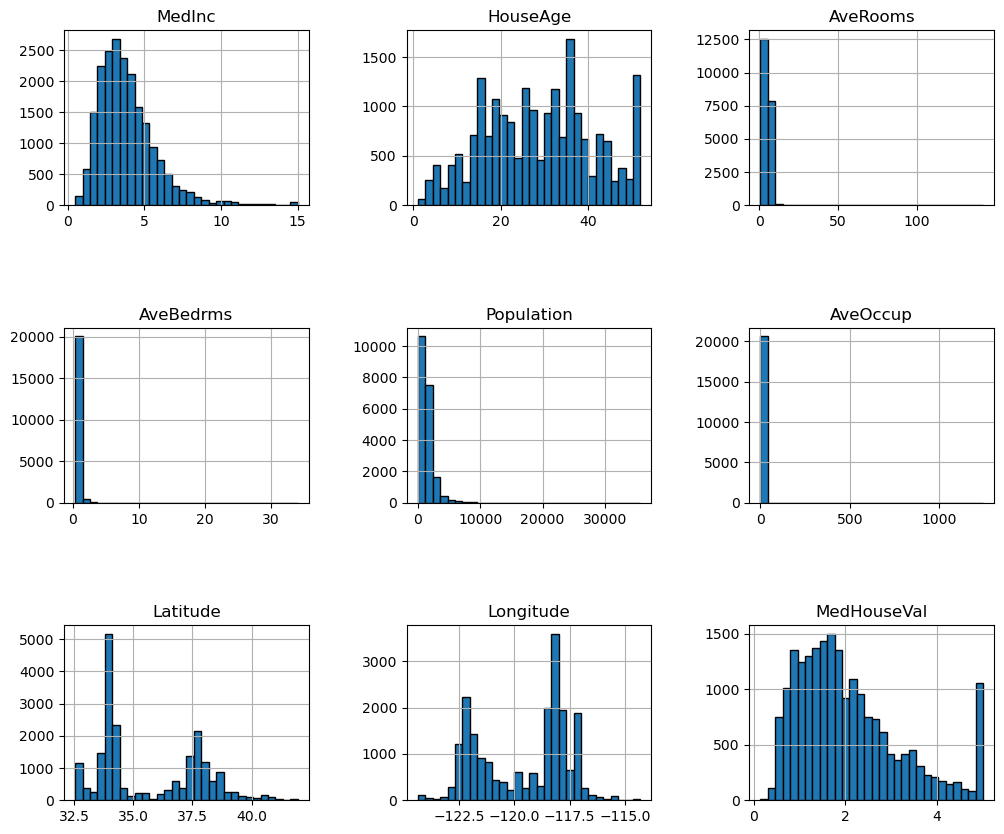

In [9]:
# Histogrammes des variables
df_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

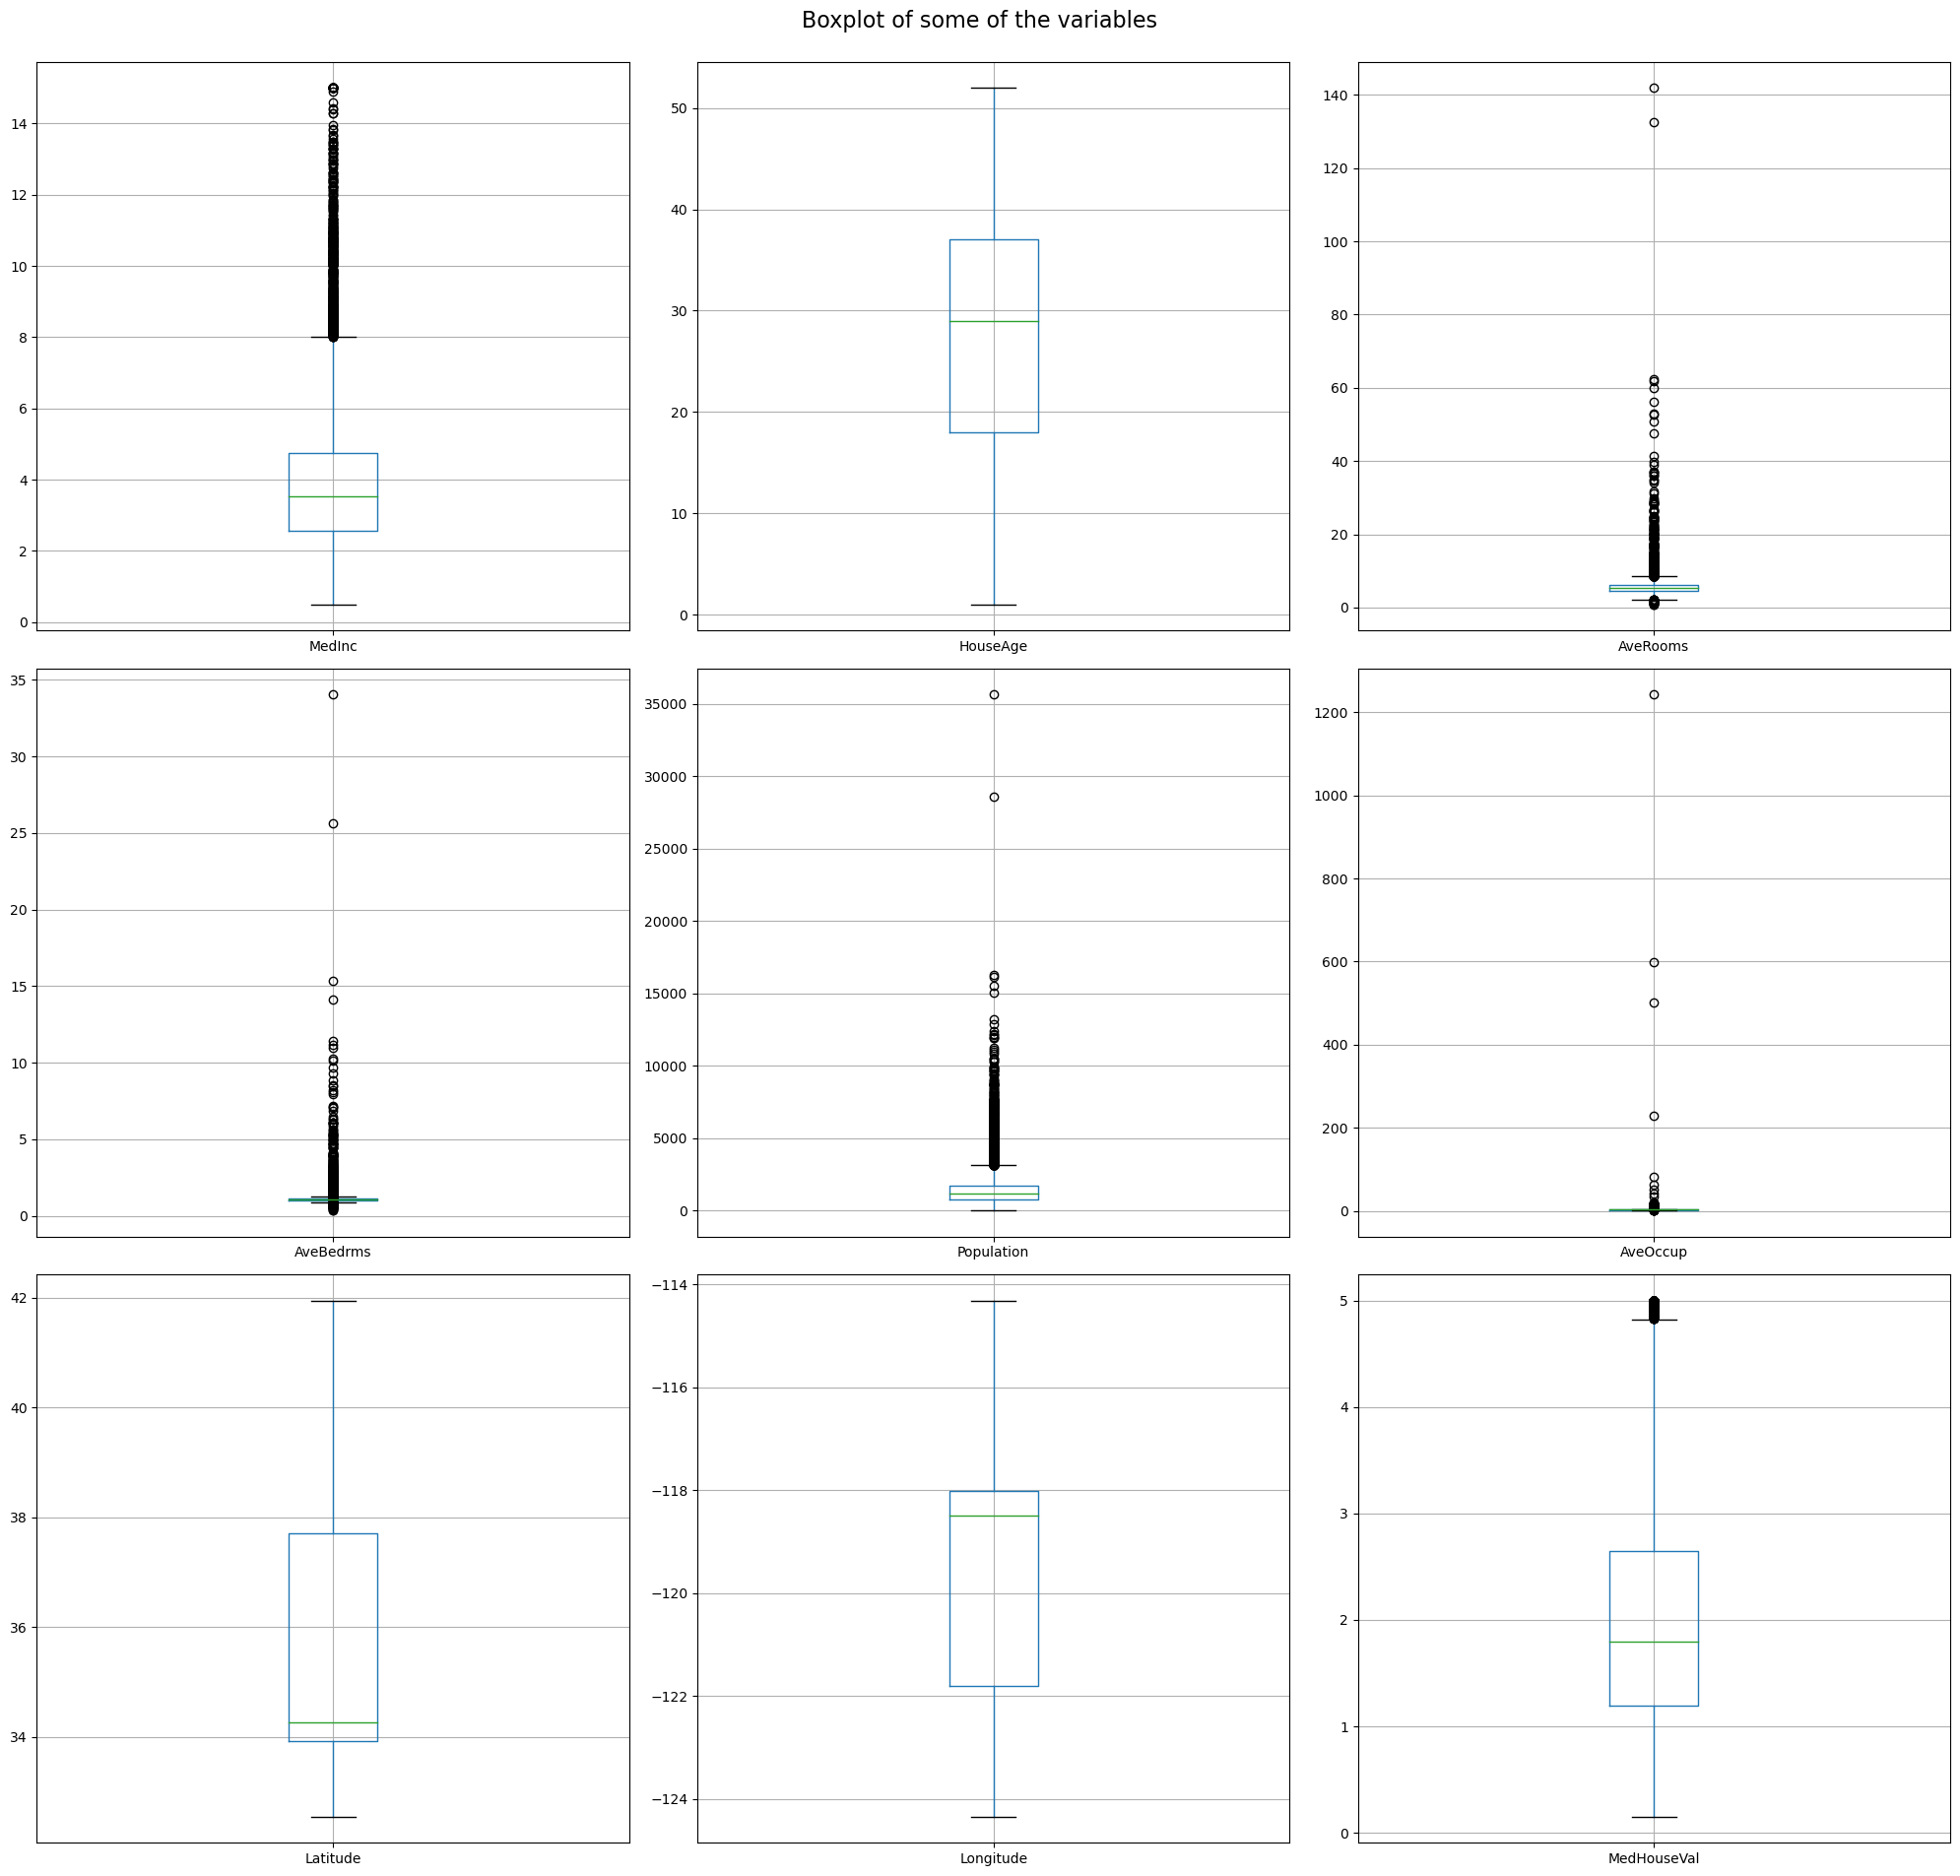

In [10]:
# Boxplot des variables

variables = df_raw.columns

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(variables):
    df_raw.boxplot(col, ax=axs[i])
    
fig.suptitle('Boxplot of some of the variables', fontsize=16)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

Détails des features avec valeurs abérrantes

In [11]:
features_of_interest = ["AveRooms", "AveOccup", "Population"] 
california_housing.frame[features_of_interest].describe()

,AveRooms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000
mean,5.429000,3.070655,1425.476744
std,2.474173,10.386050,1132.462122
min,0.846154,0.692308,3.000000
25%,4.440716,2.429741,787.000000
50%,5.229129,2.818116,1166.000000
75%,6.052381,3.282261,1725.000000
max,141.909091,1243.333333,35682.000000


### Questions

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Observez les graphiques ci-dessus. Que pouvez vous dire sur les valeurs extrêmes des variables "AveRooms", "Population" et "AveOccup" ? Qu'est-ce qu'un "block group" ?</p>

<p style="background-color:#AFEEEE;padding:3px">Note: Aidez-vous de la description des données obtenue plus haut. Ne décrivez pas simplement les graphiques: donnez une explication. </p>

___
*Réponse:*<br>
<li><strong>AveRooms:</strong> Les valeurs extrêmement élevées pour "AveRooms" pourraient indiquer des erreurs dans la collecte ou la saisie des données. Alternativement, cela pourrait refléter des situations inhabituelles, comme des logements de grande taille ou des propriétés non résidentielles (comme des hôtels) incluses par erreur dans les données.</li><br>
<li><strong>Population:</strong> Les valeurs extrêmes observées dans la distribution de la population par block group suggèrent une variabilité considérable dans la densité de population des différentes zones. Certaines zones peuvent être densément peuplées, tandis que d'autres sont beaucoup moins peuplées. Cette variabilité pourrait être liée aux caractéristiques géographiques (zones urbaines vs rurales) ou socio-économiques des block groups.</li><br>
<li><strong>AveOccup:</strong> Des valeurs très élevées pour "AveOccup" peuvent indiquer des situations de surpeuplement ou des erreurs dans les données. Dans certains cas, cela pourrait aussi refléter des caractéristiques uniques de certains block groups, comme des zones avec des logements collectifs ou des logements temporaires.</li><br> 
<li><strong>block group</strong>: "[gouvernement fédéral] Unité géographique du recensement américain qui est une combinaison de blocs de recensement. Un block group est la plus petite unité pour laquelle le U.S. Census Bureau rapporte une gamme complète de statistiques démographiques. Il y a environ 700 résidents par groupe d'îlots. Un block group est une subdivision d'un secteur de recensement."</li><br>
<br>
<br>
Src:
<a href="https://chat.openai.com/"> <br>Merci à chatgbt pour les idées </a>; <br>
<a href="https://support.esri.com/en-us/gis-dictionary/block-group#:~:text=A%20block%20group%20is%20the,subdivision%20of%20a%20census%20tract.">Block group definition</a>; <br>
___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.1: </b> Points obtenus: /8
</div>

Remarques: 

### 1.2 Nettoyage des données

Pour avoir un meilleur aperçu des données, nous allons supprimer quelques observations extrêmes. Pour prédire le prix d'une maison à partir de données régionales, nous pouvons exclure les éléments sortants de l'ordinaire. Si vous le souhaitez, vous pouvez réafficher différents graphiques pour voir vos nouvelles données.

In [12]:
df = df_raw[(df_raw["AveRooms"] < 10) & (df_raw["Population"] < 20000)]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Combien de lignes ont été supprimées ? </p>
Il y'a 229 lignes supprimées [(20639-20411)+1]


(2 point)

___
*Réponse:*
Il y'a 229 lignes supprimées [(20639-20411)+1]
___

### 1.3 Ho non ! Le code ci-dessous affiche un magnifique graphique mais on ne comprends rien au code !



Complétez les commentaires "# -" du code ci-dessous pour que votre assistant puisse enfin comprendre le code qu'il a copié sur [scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).  Aidez-vous de la documentation si nécessaire mais gardez les descriptions simples. Quelques mots suffisent, pas besoin de grande phrases.

(10 points)

In [13]:
# Génération d'une seed
rng = np.random.RandomState(0)

# Sélection aléatoire de 10000 indices parmi le nombre total de lignes dans df, sans remplacement
indices = rng.choice(np.arange(df.shape[0]), 
                     size=10000,
                     replace=False)

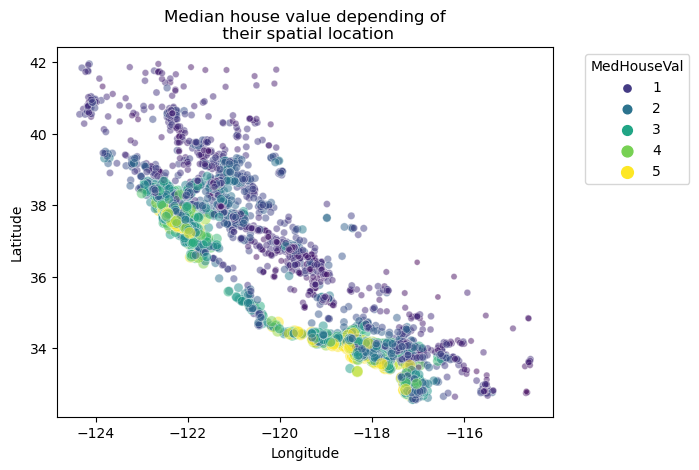

In [14]:
# Création du scatterplot
sns.scatterplot(
    data=df.iloc[indices],                         # -
    x="Longitude", y="Latitude",                   # Colonnes de "data" utilisées pour les axes x et y
    size="MedHouseVal",                            # -
    hue="MedHouseVal",                             # -
    palette="viridis",                             # -
    alpha=0.5)                                     # -

# Ajoit d'une légendre, dont un titre. En haut à gauche
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Si vous n'êtes pas familier avec la Californie, allez jeter un coup d'oeil sur Google maps. Que pouvez-vous observer concernant le prix median des maisons ?</p>
(2 points)

___
*Réponse:* <br>
Logiquement les zone côtières ont des valeurs médianes de maison plus élevées. Ensuite les grandes villes ont des valeurs médianes plus élevées, Ensuite elle varie avec la proximité des commodités, les disparités socio. <br>
Src: <br>
<a href="https://www.google.com/maps/place/34%C2%B042'41.7%22N+120%C2%B025'04.6%22W/@34.6683607,-120.504946,17548m/data=!3m1!1e3!4m4!3m3!8m2!3d34.7115833!4d-120.4179444?entry=ttu"> 34 -120</a>
<br>
<a href="https://www.google.com/maps/place/34%C2%B042'41.7%22N+116%C2%B025'04.6%22W/@37.8024073,-123.2842976,1920160m/data=!3m1!1e3!4m4!3m3!8m2!3d34.7115833!4d-116.4179444?entry=ttu">34 -116 </a>
<br>
<a href="https://www.google.com/maps/place/40%C2%B042'41.7%22N+122%C2%B025'04.6%22W/@40.7119555,-122.4475282,15982m/data=!3m1!1e3!4m4!3m3!8m2!3d40.7115833!4d-122.4179444?entry=ttu">40 -122 </a> <br>
    ...
    <br>
___

On crée maintenant un joli pairplot à l'aide de Seaborn:

C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


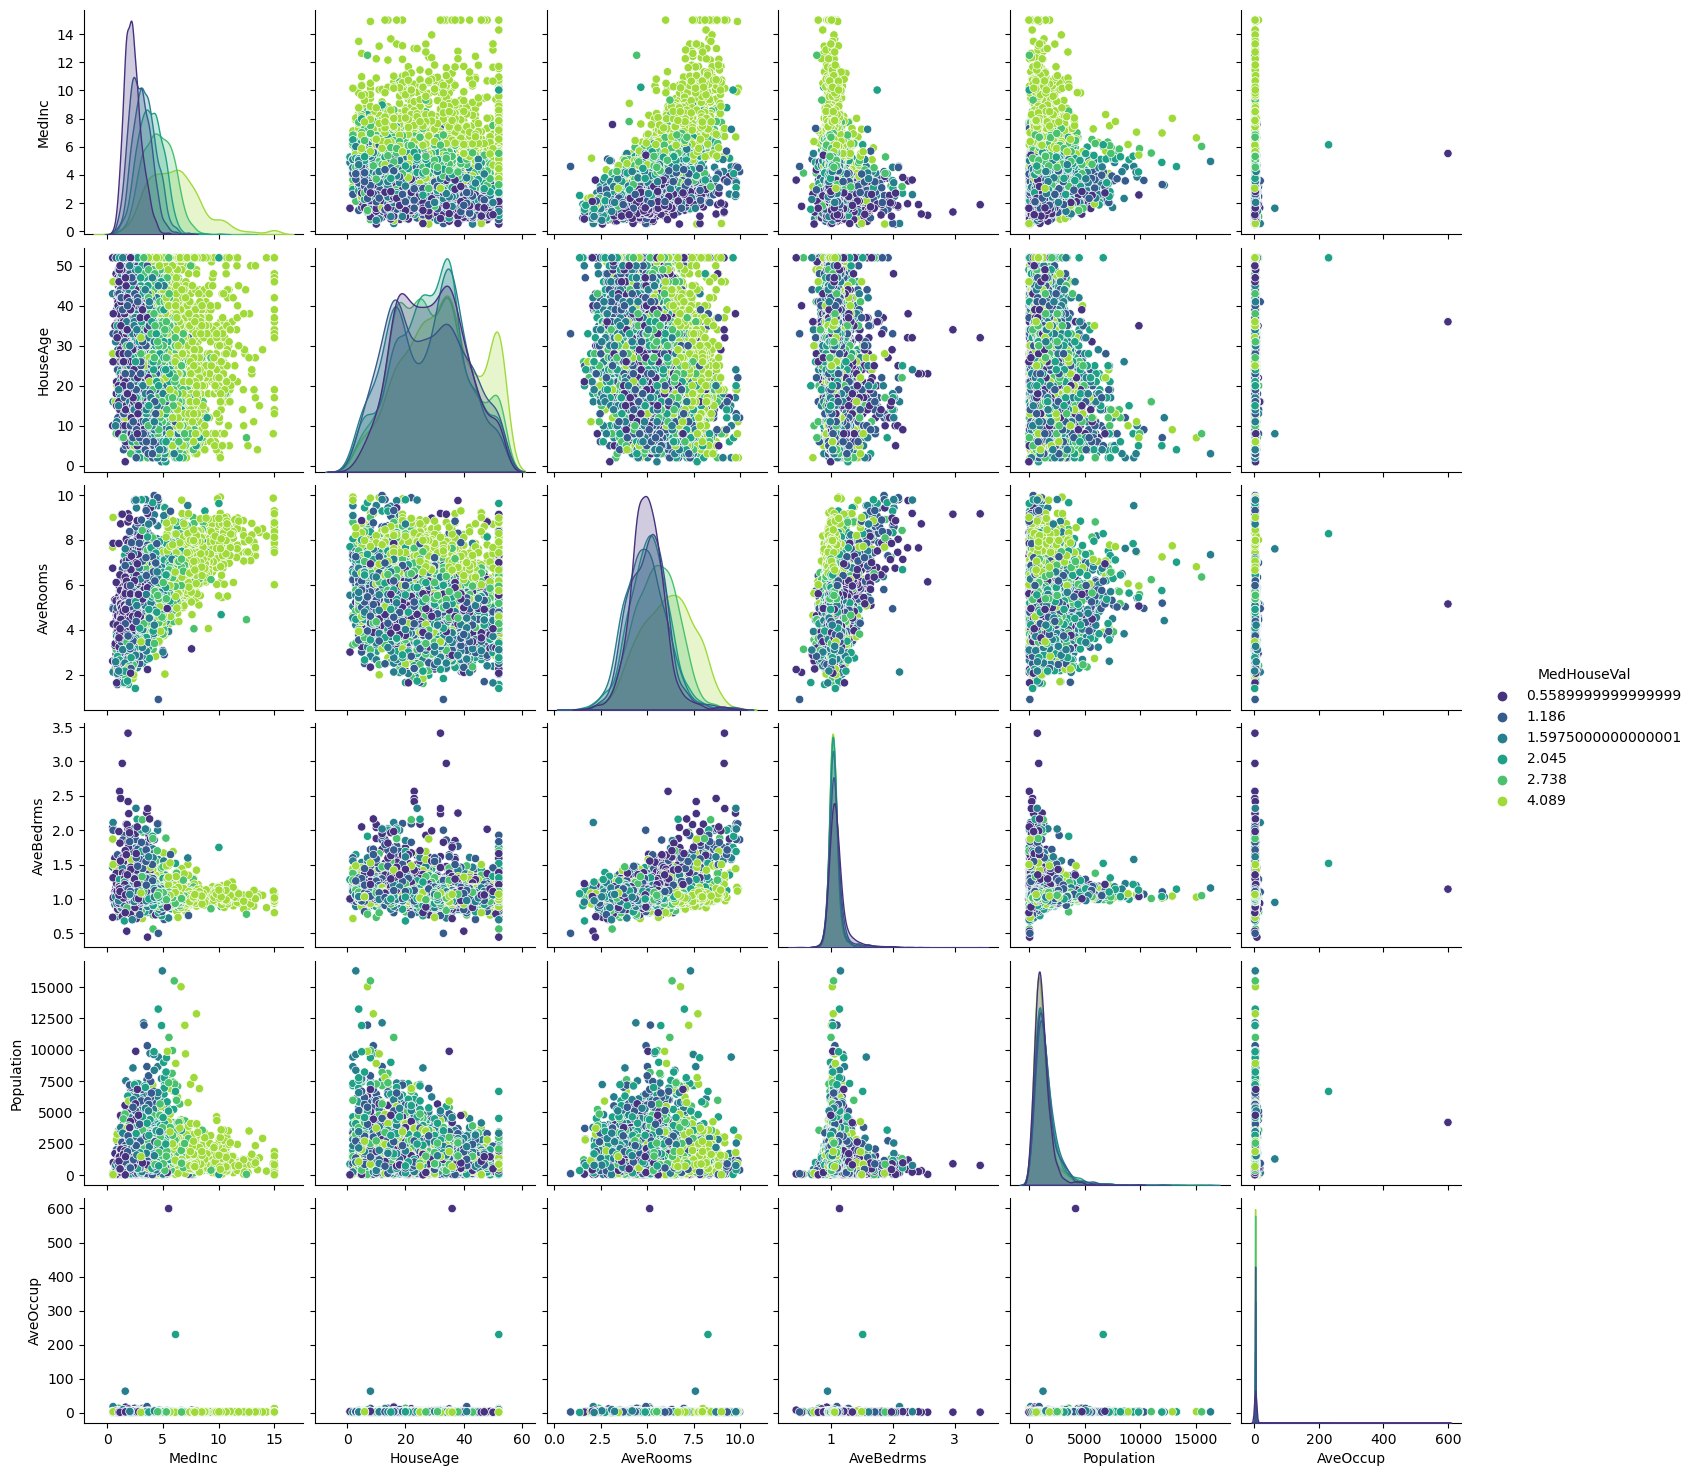

In [15]:
# Inutile de garder ces deux colonnes
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Ignorez ce petit passage un peu complexe, c'est pour avoir 6 couleurs pour une variable continue. 
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

### 1.4 Interprétation et analyse des graphiques

Dans la partie suivante, nous essayerons de prédire la variable MedHouseVal en fonction des autres variables, une à une. Observez les différents graphiques réalisés dans cette analyse exploratoire. 

(6 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelles variables pourraient être, à elles seules, de bons prédicteurs ? Ou de mauvais ? Ajouteriez-vous un ou plusieurs autre graphiques pour visualiser les données ? Justifiez vos réponses.</p>

___
*Réponse:* <br>
<strong>Les variables qui sont de bons prédicteurs:</strong>
<br>
<strong>MedInc:</strong>
<br>
C'est un bon prédicteur car il montre une tendance positive avec MedHouseVal, indiquant que les maisons dans les zones à revenu médian plus élevé ont tendance à avoir une valeur plus élevée.
<br>
<strong>AveRooms:</strong> 
<br>
Cela semble être un prédicteur décent en effet il existe une légère tendance indiquant que les maisons avec plus de pièces pourraient avoir une valeur médiane plus élevée.
<br>
<br>
<strong>Les variables sont de mauvais prédicteurs:</strong> 

<strong>AveBedrms:</strong> 
<br>
C'est un mauvais prédicteur car il n'y a pas de corrélation claire ou de tendance avec MedHouseVal, indiquant que le nombre moyen de chambres n'affecte pas de manière significative la valeur médiane des maisons.
<br>
<strong>AveOccup:</strong>
<br>
AveOccup est un mauvais prédicteur étant donné que les données ne montrent aucune corrélation cohérente entre l'occupation moyenne des maisons et leur valeur médiane.
<br>
<strong>Population:</strong> 
<br> 
C'est un mauvais prédicteur en raison de l'absence de corrélation visible et de la dispersion élevée des données par rapport à MedHouseVal.
<br>
<strong> HouseAge:</strong>
<br>
C'est un mauvais prédicteur du fait que les données sont extrêmement dispersées et ne montrent aucune tendance claire ou relation linéaire. 
<br>
 <br>
<strong>"Ajouteriez-vous un ou plusieurs autre graphiques pour visualiser les données"</strong><br> 
je rajouterais des boxplots pour visualiser la distribution de MedHouseVal en fonction des catégories d'autres variables, comme des tranches de revenu ou des catégories d'âge des maisons. Dans le but de m'aider à identifier des modèles ou des tendances dont je n'ai pas pu m'apercevoir dans les scatterplots.

Aide: <br>
<a href="https://sites.uclouvain.be/infosphere_boreal/fichiers_communs/module7/connecteurs.html">Connecteur logique</a>

___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.2-1.3: </b> Points obtenus: 14/20
</div>

Remarques: Manque 5 commentaires 1.2 (-5). Pour visualiser la distribution de MedHouseVal en fonction des aux autres variables il suffirait de faire un scatterplot entre celles-ci et MedHouseVal, un boxplot n'aiderait pas vraiment.. -1

## Exercice 2: Régression linéaire simple

<div class="alert alert-block alert-warning">
<b>Attention: </b> la régression linéaire dans cet exercice peut prendre environ 5 minutes avec les hyper-paramètres actuels. 
</div>

Maintenant que vous êtes familiarisés avec la base de données, vous allez utiliser l'algorithme de régression linéaire simple vu en classe. 

Si vous voulez revoir comment fonctionne la régression linéaire d'une manière plus vidéastique, je vous conseille [cette vidéo de StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo) qui revoit étape par étape le fonctionnement de la régression simple et de l'ajustement d'une ligne aux données, de $ R^2 $ et de la régression multiple (en Anglais simple et clair mais quand même en 25 minutes, les premières 10 minutes suffisent). [Cette vidéo](https://www.youtube.com/watch?v=PaFPbb66DxQ) vous résume en moins de temps le concept qui va être utilisé dans le code ci-dessous: comment ajuster une ligne aux données. 






### 2.1 Complétez les commentaires

(6 points)

**Les troix méthodes ci-dessous: "*compute_MSE*", "*step_gradient*" et "*gradient_descent*" n'ont pas de commentaire d'entête.** Complétez les en indiquant ce que fait la fonction et pourquoi, ce que l'on a comme paramètres et ce qu'elle retourne. Vous pouvez vous inspirer des commentaires des fonctions d'après pour le format. 

___

*Répondre directement dans le code ci-après, entre les guillemets:*

In [16]:
def compute_MSE(b,m,data):
    """
    Calcul de l'erreur quadratique moyenne (MSE) pour la régression linéaire.
    
Parameters
----------
    b : float
        L'ordonnée à l'origine de la ligne de régression.
    m : float
        La pente de la ligne de régression.
    data : np.ndarray
        Données contenant les points (x, y) pour lesquels calculer l'erreur.

Returns
-------
    float
        L'erreur quadratique moyenne calculée sur l'ensemble des données.
    """
    totalError = 0
    # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    """
Effectue une itération de descente de gradient pour ajuster b et m.
    
Parameters
----------
    b_current : float
        Valeur actuelle de b.
    m_current : float
        Valeur actuelle de m.
    data : np.ndarray
        Données d'entrainement (x, y).
    learning_rate : float
        Taux d'apprentissage pour contrôler l'ajustement.

Returns
-------
    tuple
        Nouvelles valeurs de b et m après un pas de descente de gradient.
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    """
Applique la descente de gradient sur plusieurs époques pour optimiser b et m.
    
Parameters
----------
    data : np.ndarray
        Données d'entrainement (x, y).
    starting_b : float
        Valeur initiale de b.
    starting_m : float
        Valeur initiale de m.
    learning_rate : float
        Taux d'apprentissage pour l'ajustement.
    num_epochs : int
        Nombre d'itérations de descente de gradient.

Returns
-------
    tuple
        Valeurs optimisées de b et m après toutes les époques.
    """
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b,m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b,m]

### 2.2 Pearson

(5 points)

Pour calculer le score $R^2$ on peut utiliser la fonction *r2_score()* fourni par scikit-learn ou l'écrire nous-même. Pour la beauté du geste, et quelques points bien sûr, **complétez la fonction ci-dessous pour calculer le coefficient $R^2$ (aussi appelé coefficient de détermination de Pearson, à ne pas confondre avec le coefficient de corrélation linéaire de Bravais-Pearson, souvent appelé Person Correlation en Anglais, que nous appelons simplement "corrélation" ici. ).** 

Pour être certain que votre code fonctionne, vous pouvez exécuter la cellule de TEST qui comparera les résultats de votre méthode avec ceux de la méthode préfaite de sklearn. 



In [17]:
def pearson(y, y_pred):
    """
Calcule le coefficient de détermination R², une mesure statistique de la qualité de la prédiction.

Parameters
----------
    y : array_like
        Valeurs réelles de la variable dépendante.
    y_pred : array_like
        Valeurs prédites par le modèle.

Returns
-------
    float
        Le coefficient R², indiquant la proportion de la variance de la variable dépendante qui est prévisible à partir des variables indépendantes.
    """
    # - Complétez le code et le commentaire d'entête pour calculer le coefficient de Pearson ici. - 
    # - (n'oubliez pas de changer la valeur de retour !)
    
    
    y_mean = np.mean(y)
    sum_n = 0  # Somme des carrés des écarts de la prédiction
    sum_d = 0  # Somme des carrés des écarts par rapport à la moyenne

    for i in range(len(y)):
        sum_n += (y[i] - y_pred[i]) ** 2
        sum_d += (y[i] - y_mean) ** 2

    return 1 - sum_n / sum_d


In [18]:
# SOLUTION
def pearson(y, y_pred):
    y_mean = np.mean(y)
    sum_n = 0
    sum_d = 0
    for i in range(len(y)):
        sum_n += (y[i] - y_pred[i]) ** 2
        sum_d += (y[i] - y_mean) ** 2
    return 1 - sum_n / sum_d

**Test**

Comparaison entre votre fonction et celle de scikit-learn. 

In [19]:
# TEST - Affiche un message en cas de réussite / échec de la méthode "pearson()"
import random
random.seed(0)

y = np.random.randint(20, size=10)
y_pred = np.random.randint(20, size=10)

if (round(pearson(y, y_pred), 3) == round(r2_score(y, y_pred), 3)): 
    print(f"RÉUSSITE - La fonction pearson() donne le résultat attendu.")
else:
    print(f"ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.")

RÉUSSITE - La fonction pearson() donne le résultat attendu.


<div class="alert alert-block alert-info">
<b>Corrections 2.1 - 2.2: </b> Points obtenus: 11/11
</div>

Remarques: 

### 2.3 Exécution du code vu en cours

Le code ci-dessous est simplement un joli packaging  du code vu en cours. 

In [20]:


def score_simple_linear_regression(df: pd.DataFrame, var: str, lr: float, n_epochs: int, label: str = 'MedHouseVal', n_repetitions: int = 100) -> tuple:
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the California dataset.
    var : str
        Variable to use as feature.
    label : str, default 'MedHouseVal'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
        
    Returns
    -------
    Tuple
        (Mean score, list of labels, list of predictions, best m, best b)
    """
    scores = []
    labels = []
    predictions = []
    
    data = df[[var, label]].values
    
    ms = []
    bs = []
    
    for _ in range(n_repetitions):
        train, test = train_test_split(data, test_size=0.2)
        # Initialize m and b.
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        # Step 4: gradient descent
        [b, m] = gradient_descent(train, initial_b, initial_m, lr, n_epochs)
        preds = test[:, 0] * m + b
        lbls = [test[i, 1] for i in range(len(test))]
        ms.append(m)
        bs.append(b)
        
        # Inversez le commentaire ci-dessous pour utiliser la méthode de sklearn.
        #scores.append(r2_score(lbls, preds))
        scores.append(pearson(lbls, preds))
        
        labels += lbls
        predictions += list(preds)
    
    best_idx = scores.index(max(scores))
    
    return np.mean(scores), labels, predictions, ms[best_idx], bs[best_idx]

def plot_regression_line(data: np.ndarray, x_name: str, y_name: str, m: float, b: float, title: str) -> plt.axes:
    """
    Plot the regression line usimg the given `m` and `b`.
    
    Parameters
    ----------
    data : np.ndarray
        Data with the variable and the label to plot. 
        Label must be in the last column.
    x_name : str
        Name of the column for x.
    y_name : str
        Name of the column for y.
    m : float
        m value to use for the predictions.
    b : float
        b value to use for the predictions.
    title : str
        Title of the plot.
        
    Returns
    -------
    plt.axes
        Matplotlib ax. 
    """
    fig, ax = plt.subplots(figsize=(15, 9))
    data.plot.scatter(x=x_name, y=y_name, ax=ax, title=title)
    y_pred = m * data[x_name] + b
    ax.plot(data[x_name].values, y_pred, 'r')
    ax.text(0.025, 0.925,
            f'$R^2={np.round(r2_score(data[y_name].values, y_pred), 3)}$',
            fontsize=12, transform=ax.transAxes)
    return ax

Si vous n'avez pas réussi à écrire une fonction **pearson()**, (de)commentez les lignes indiquées dans la fonction "*score_simple_linear_regression()*" ci-dessus afin d'utiliser la méthode de sklearn. 


Comme vu dans le labo précédent, il vaut souvent mieux normaliser/standardiser les données (moyenne nulle et écart-type à 1). Ça n'est pas toujours le cas et ça peut être discutable. Ici nous allons normaliser les variables indépendantes que nous voulons utiliser pour la régression linéaire simple. 

*Tip: n'oubliez pas que vous pouvez développer ou réduire la sortie de l'exécution d'une cellule en cliquant sur la gauche de la cellule. Comme la sortie de la cellule suivante est relativement longue, la réduire pour ne pas scroller pendant trop longtemps peut être utile!*


Variables testées pour la régression linéaire simple: ['MedInc', 'AveRooms', 'Population']
Variable MedInc
Learning rate: 0.5


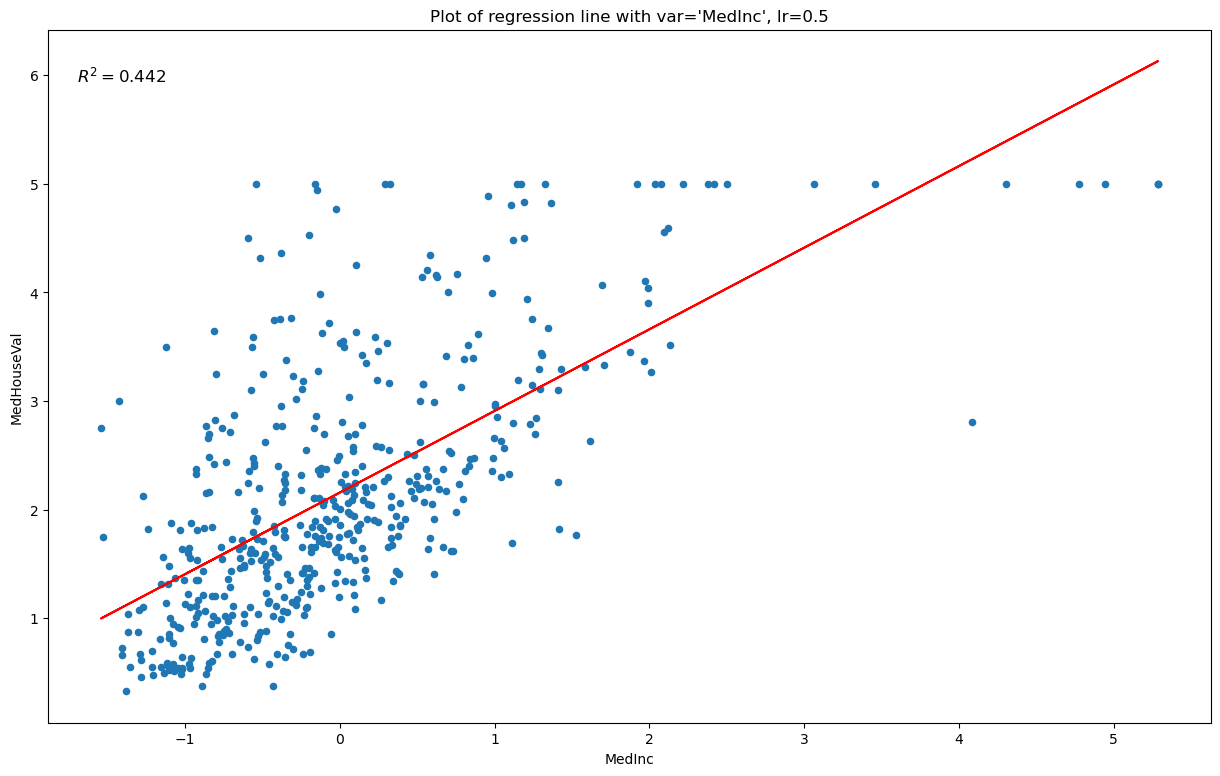

Learning rate: 0.1


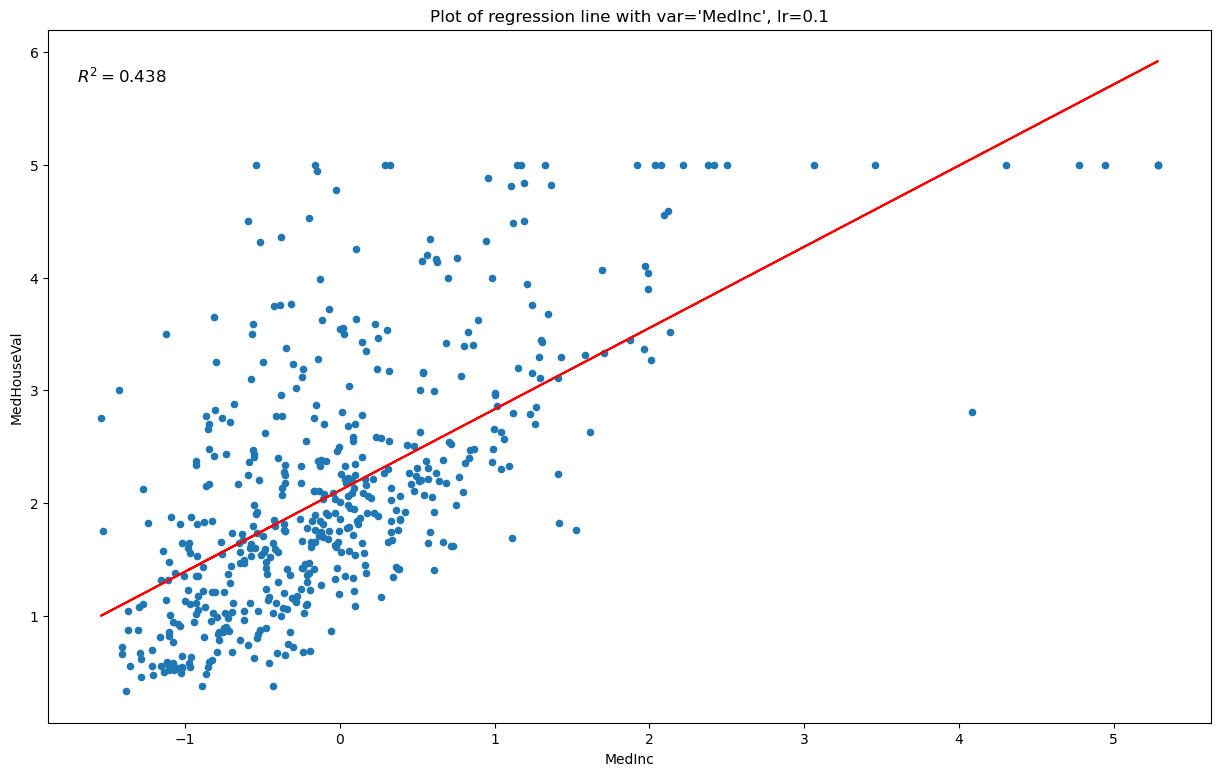

Learning rate: 0.01


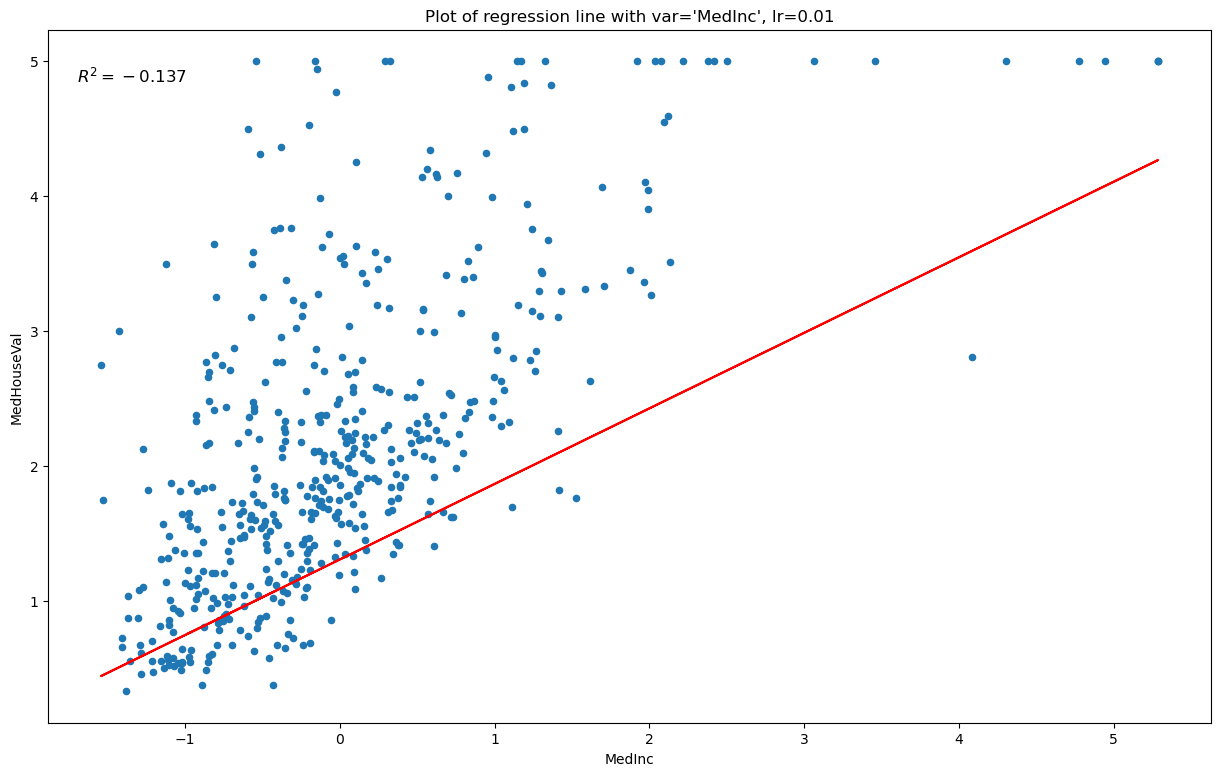

Learning rate: 0.001


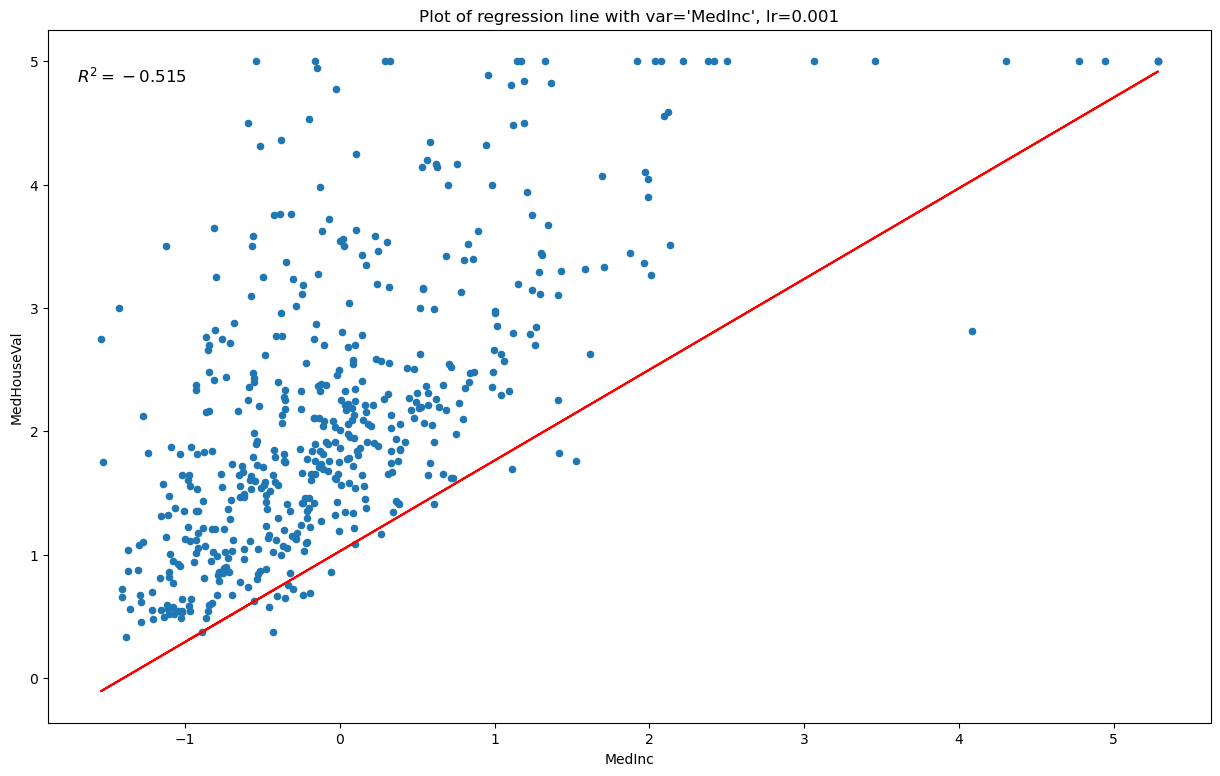

Variable AveRooms
Learning rate: 0.5


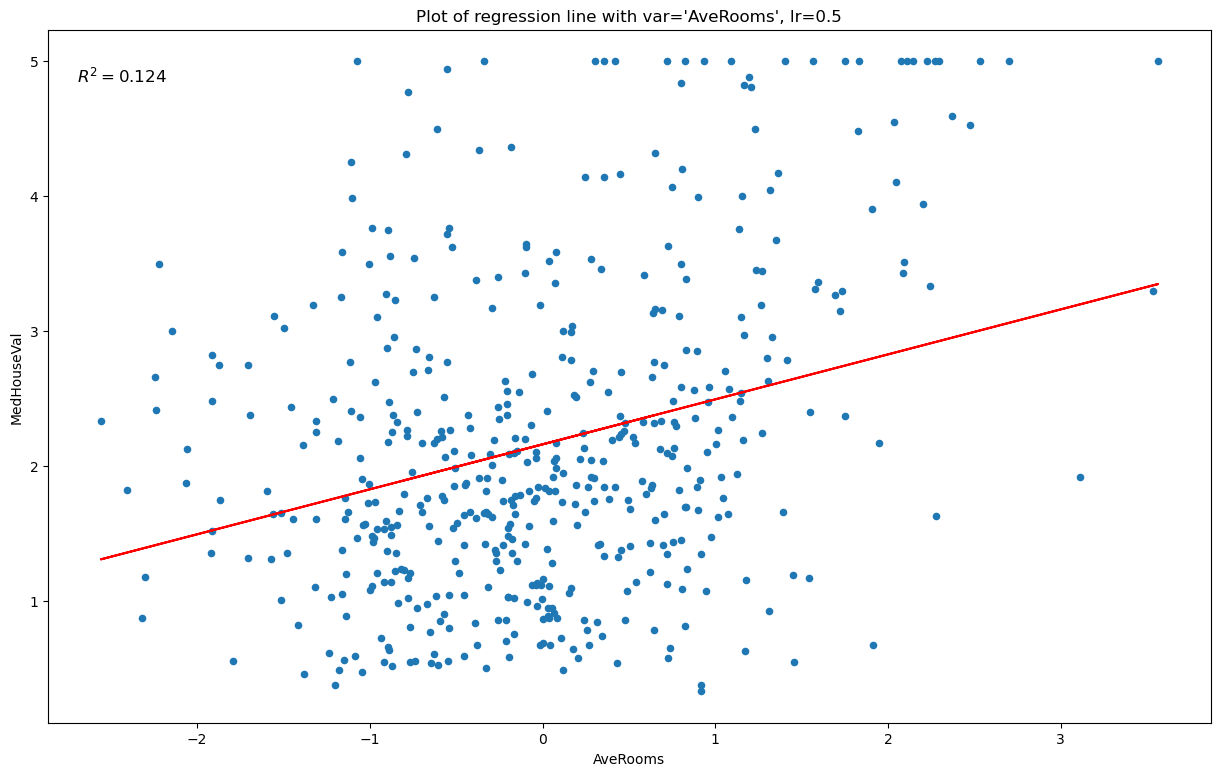

Learning rate: 0.1


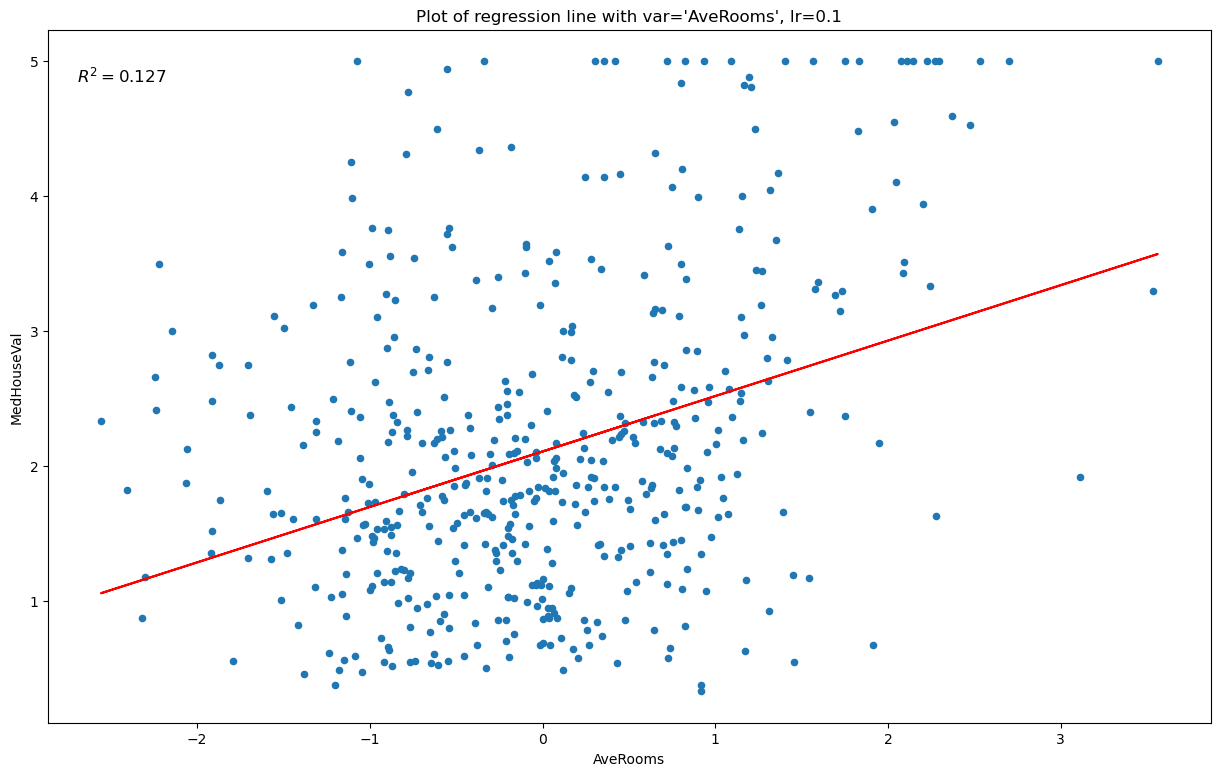

Learning rate: 0.01


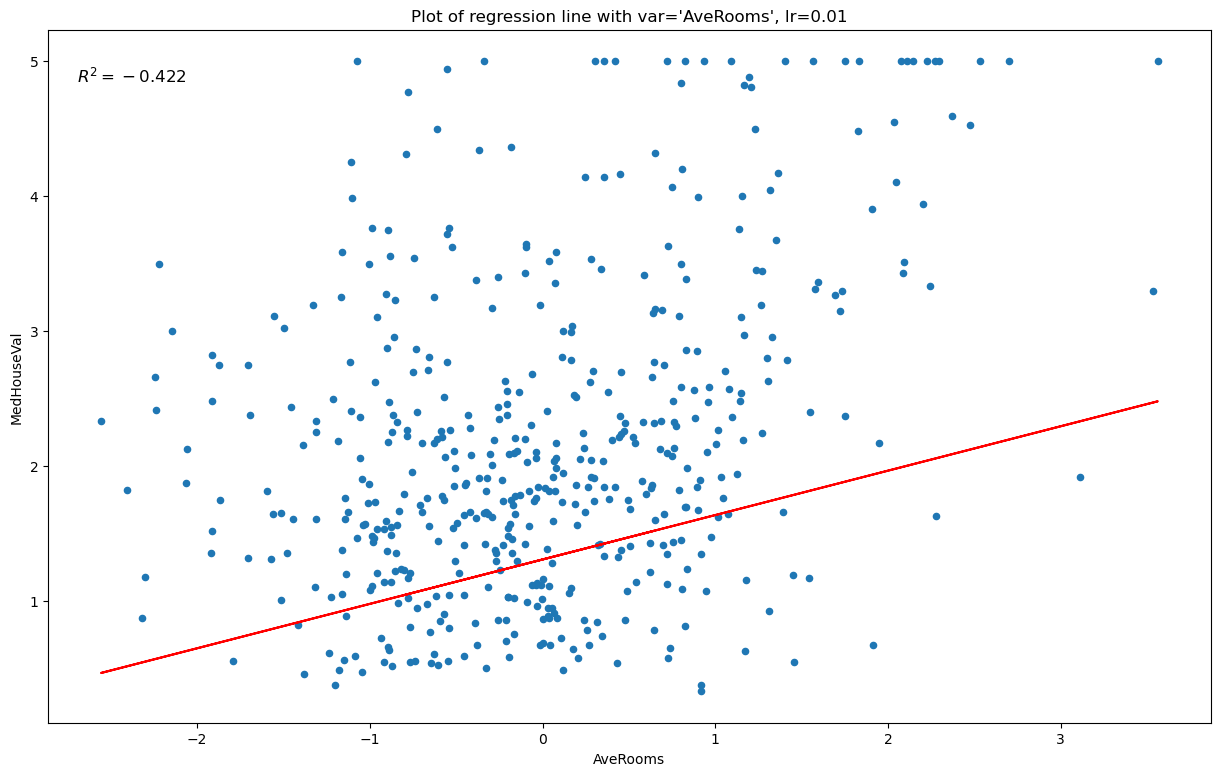

Learning rate: 0.001


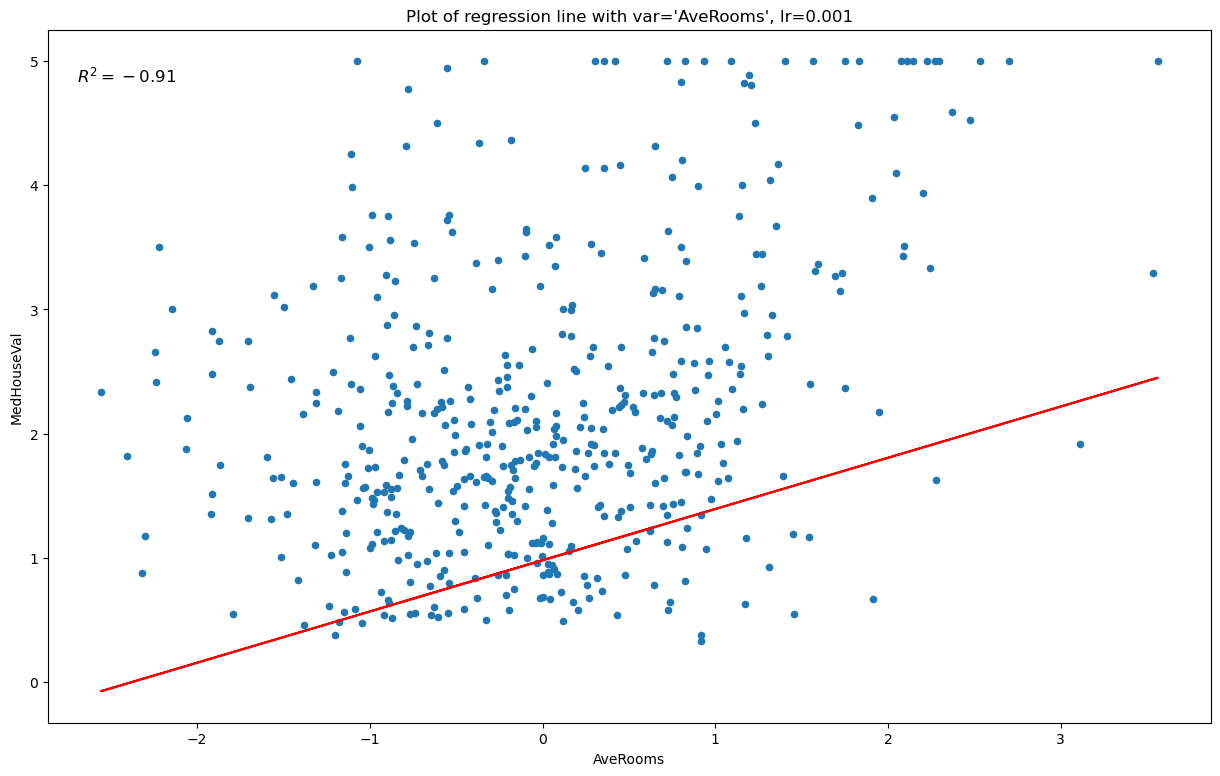

Variable Population
Learning rate: 0.5


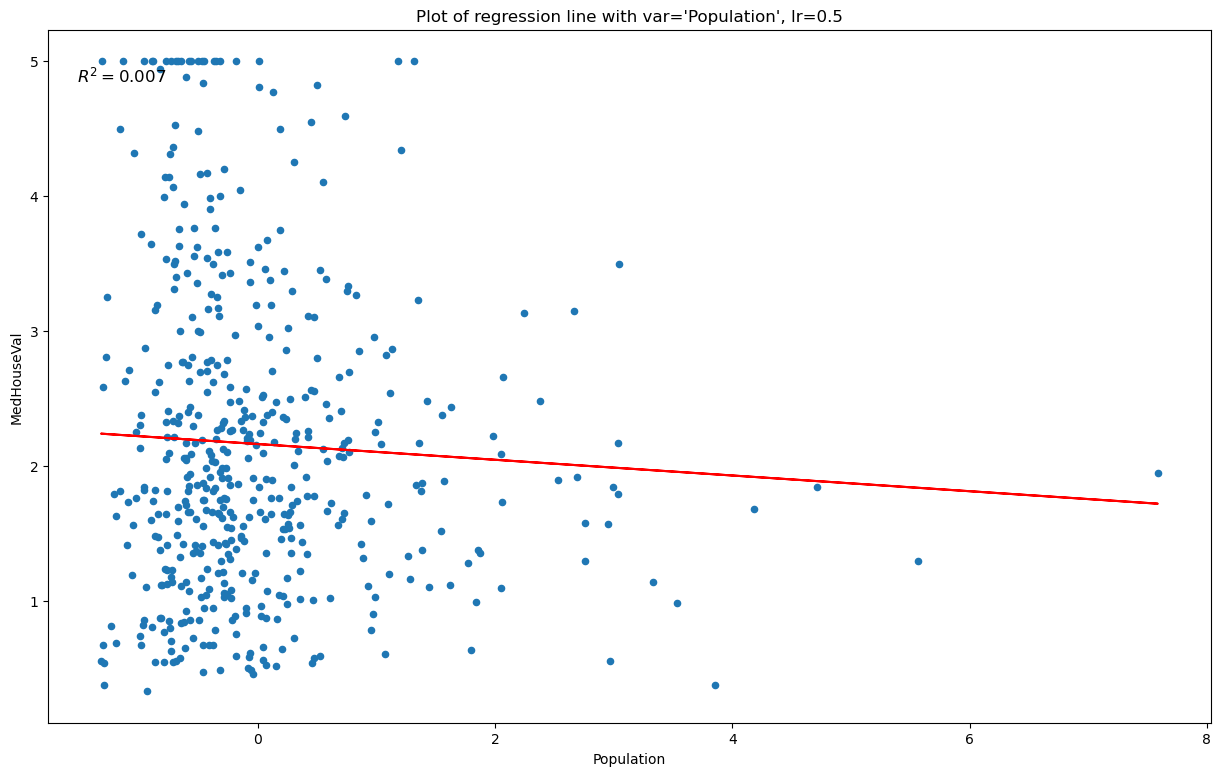

Learning rate: 0.1


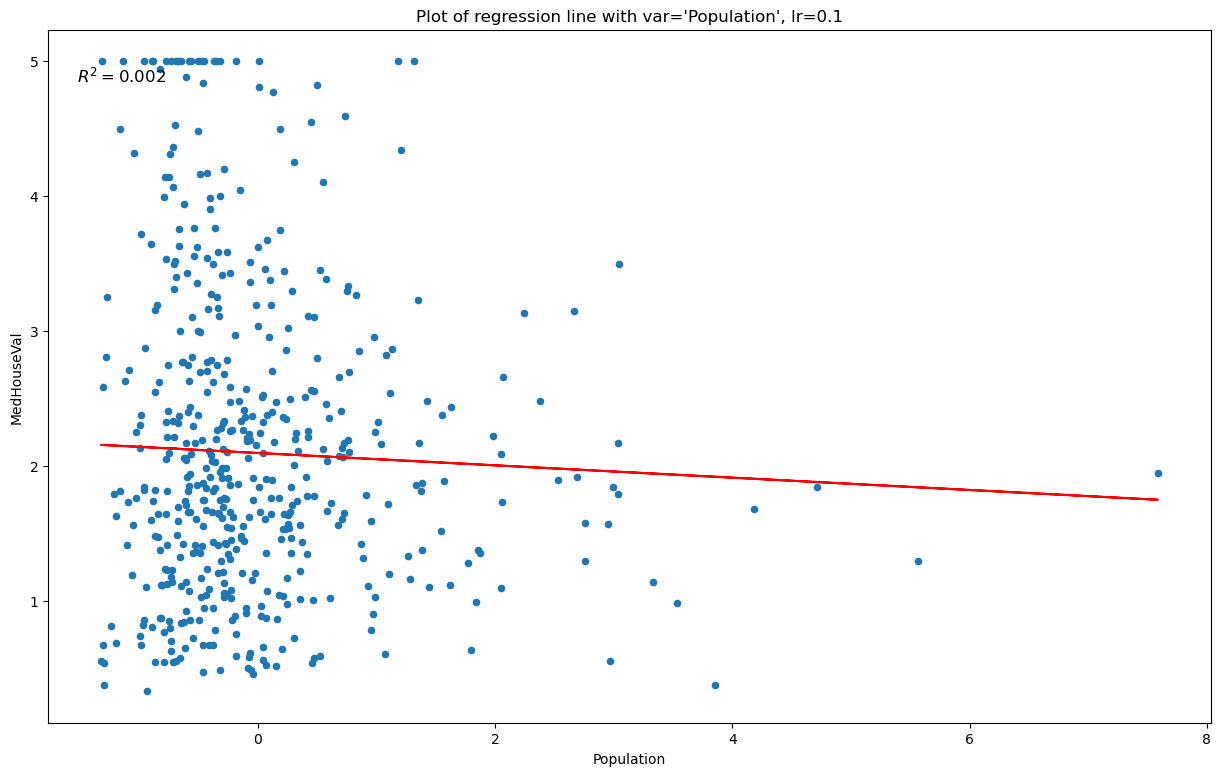

Learning rate: 0.01


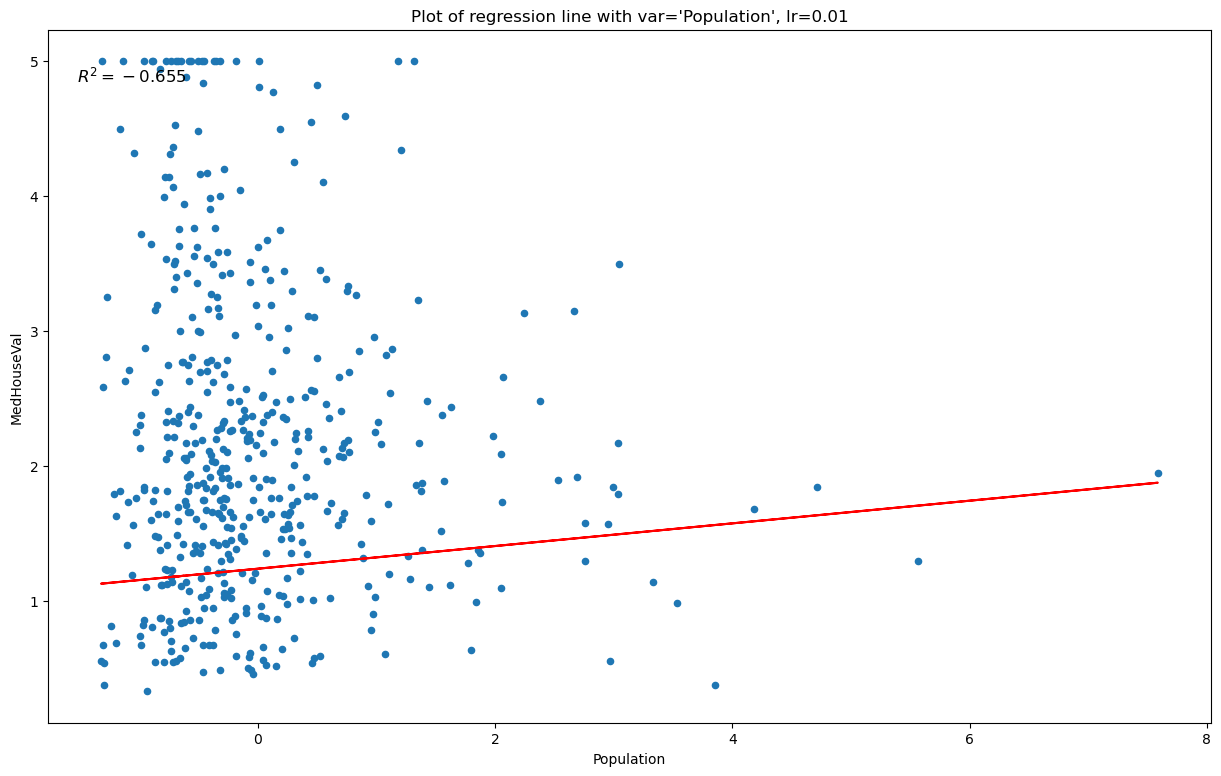

Learning rate: 0.001


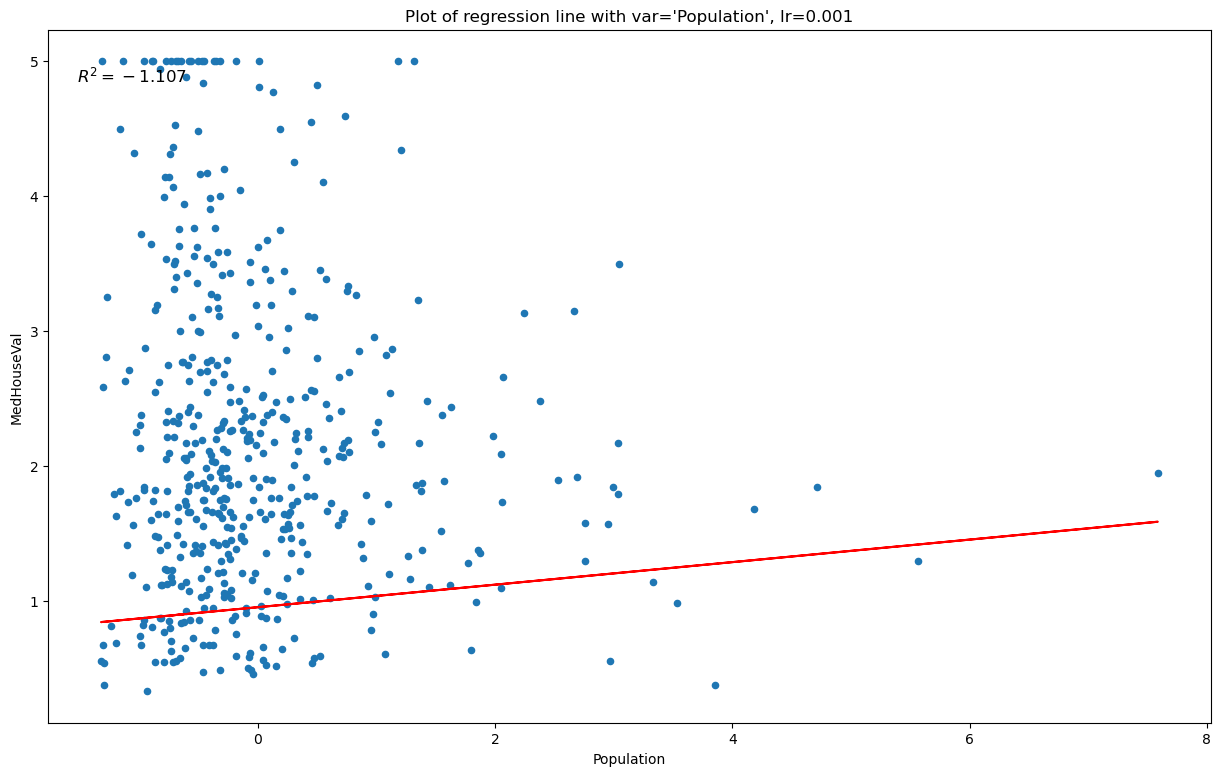

Exécution: 209.47505640983582 secondes


In [21]:
import time
random.seed(0)

# Mesure du temps au début
start = time.time()


# On va prendre un subset du dataframe, avec sa taille on en aurait pour 1h de calcul à chaque fois.
indices = rng.choice(np.arange(df.shape[0]), 
                     size=500,
                     replace=False)
subset_df = df.iloc[indices]

# Standardisation

# Copie de l'échantillon et normalisation des colonnes choisies (toutes sauf MedHouseVal)
df_normalized = subset_df.copy()
cols = subset_df.columns[df.columns != 'MedHouseVal']
scaler = StandardScaler()

df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

variables = ['MedInc',
             'AveRooms',
             'Population']


print(f"Variables testées pour la régression linéaire simple: {variables}") 
label = 'MedHouseVal'

learning_rates = [0.5, 0.1, 0.01, 0.001]
n_epochs = 30
scores = {}

for var in variables:
    print(f"Variable {var}")
    scores[var] = {}
    for lr in learning_rates:
        print(f"Learning rate: {lr}")
        score, _, _, m, b = score_simple_linear_regression(df_normalized, var, lr, n_epochs, label=label)
        scores[var][lr] = score
        plot_regression_line(df_normalized, var, 'MedHouseVal', m, b, f'Plot of regression line with {var=}, {lr=}')
        plt.show()

end = time.time()
print(f"Exécution: {end - start} secondes")

### 2.4 Question

(5 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quel est le meilleur score que vous obtenez et que signifie-t-il (qu'est-ce que $R^2$) ?</p>




*Réponse:*<br> 
Meilleur Score $R^2$ et Sa Signification
Le meilleur score $R^2$ obtenu dans vos tests indique la proportion de la variance de la variable dépendante (ici MedHouseVal) qui est expliquée par la variable indépendante testée (comme MedInc, AveRooms, Population). Un $R^2$ élevé signifie que le modèle de régression linéaire simple a une bonne capacité prédictive pour la variable en question. Un $R^2$ de 1 signifierait une prédiction parfaite, tandis qu'un $R^2$ de 0 indiquerait que le modèle ne prédit pas mieux que le hasard ou la moyenne constante.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quels sont les risques en choisissant un learning rate trop petit ou trop grand ?</p>

*Réponse:* <br><br>
<strong>Taux d'Apprentissage Trop Petit</strong>
<li><strong>Convergence Lente:</strong> Le modèle peut nécessiter de nombreuses itérations (époques) pour converger vers le minimum de la fonction de coût. Cela peut être inefficace en termes de temps de calcul.</li>
<li><strong>Risque de Convergence Incomplète:</strong> Si le nombre d'itérations n'est pas suffisant, le modèle peut ne jamais atteindre l'optimum et donc ne pas fournir les meilleures prédictions possibles.</li>
<br><br>
<strong>Taux d'Apprentissage Trop Grand</strong>
<li><strong>Divergence: </strong>Si le taux est trop élevé, le modèle peut "sauter" par-dessus le minimum de la fonction de coût et ne jamais converger, entraînant une augmentation de l'erreur au lieu d'une diminution. </li>
<li><strong>Oscillations:</strong> Un taux d'apprentissage élevé peut également entraîner des oscillations autour du minimum, empêchant le modèle de stabiliser ses paramètres pour une prédiction optimale.</li>
<br><br>
Aide: <br> 
<a href="https://datacorner.fr/sgd-learning-rate/"> Aide 1 </a> <br>
<a href="https://fr.quora.com/Comment-est-ce-quon-choisit-le-learning-rate-dans-un-probl%C3%A8me-dintelligence-artificielle"> Aide 2 </a> <br>
<a href="http://www.idris.fr/media/formations/dlo-jz/dlojz4_entrainement_large_batches-notes.pdf"> Aide 3 </a> <br>
<a href="https://chat.openai.com/" Aide 4 </a> <br>


___

<div class="alert alert-block alert-info">
<b>Corrections 2.4: </b> Points obtenus: 4/5
</div>

Remarques: Quel est le meilleur score R^2 que vous obtenez?

___
___

## Exercice 3: Régression linéaire multiple



Lorsqu'on utilise plus d'une variable pour la régression, il est important d'avoir une idée de la [corrélation](https://en.wikipedia.org/wiki/Correlation) entre lesdites variables. Ci-dessous, on affiche la matrice de corrélation qui montre pour chaque variable, à quel point elle est corrélée avec les autres. On veut éviter de prendre deux variables corrélées entre elles car cela peut poser des problèmes (sujet pas abordé ici). 

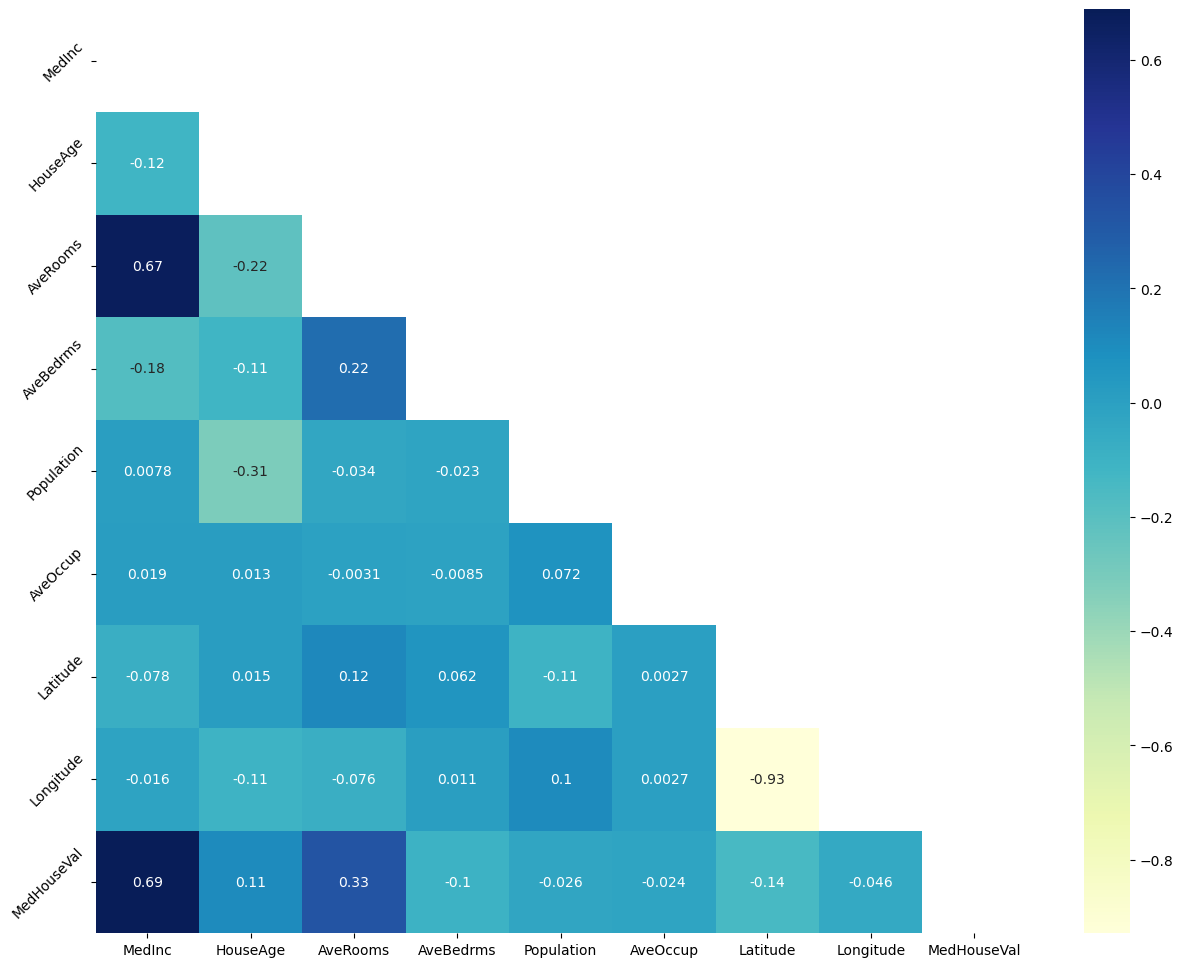

In [22]:
# Heatmap de la matrice de corrélation.

# Masque pour la partie supérieure de la matrice, qui est symétrique. 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Figure et plot
fig, ax = plt.subplots(figsize=(15,12)) 
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.yticks(rotation=45) 
plt.show()

### 3.1 Question

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles variables sont fortement ($ |corr| > 0.2$) corrélées entre elles ? Est-ce que ces corrélations ont toutes un sens ? Développez.</p>

___



*Réponse:* <br>
<strong>MedInc avec Med House Val:</strong> Loqique les zones avec des revenus plus élevés ont tendance à avoir des maisons plus chères.
<br>
<strong>Ave Rooms with MedHouseVal:</strong> Des maisons avec plus de pièces sont plus chers.
<br>
<strong>AveRomms with AveBedrooms:</strong> Une augmentation du nombre total de pièces dans une maison = également une augmentation du nombre de chambres.
<br>
<strong>MedInc with AveRooms:</strong> Plus de pouvoir d'achat = une maison avec plus de pièces 


___

### 3.2 Régression

Exécutez les cellules ci-dessous.



In [23]:
# Version sklearn

def score_linear_regression(df: pd.DataFrame, *var: str, label: str = 'MedHouseVal', n_repetitions: int = 100):
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the boston dataset.
    var : Tuple of str
        Tuple with the variables to use as feature.
    label : str, default 'MEDV'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
    """
    scores = []
    labels = []
    predictions = []
    
    for _ in range(n_repetitions):
        regressor = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(df[list(var)], df[label], test_size=0.2)
        regressor.fit(X_train, y_train)
        labels.append(y_test)
        predictions.append(regressor.predict(X_test))
        scores.append(regressor.score(X_test, y_test))
    return np.mean(scores), labels, predictions

On choisit ensuite les groupes de variables non-corrélées entre elles que nous allons tester.


In [24]:

combos = [['Latitude', 'Longitude'], 
          ['AveRooms', 'Population', 'MedInc'],
          ['AveRooms', 'Population'], 
          ['AveRooms', 'MedInc'], 
          ['Population', 'MedInc']]

label = 'MedHouseVal'



Puis nous réalisons la régression linéaire multiple avec chaque groupe en utilisant notre fonction créée ci-dessus. 

In [25]:
for variables in combos:
    print(f'Model using {variables}')
    score, y_true, y_pred = score_linear_regression(df_normalized, *variables, label=label)
    print(f'Score={score}')
   

Model using ['Latitude', 'Longitude']
Score=0.2133245253927942
Model using ['AveRooms', 'Population', 'MedInc']
Score=0.44183795637558276
Model using ['AveRooms', 'Population']
Score=0.11601481639487124
Model using ['AveRooms', 'MedInc']
Score=0.43088041211326195
Model using ['Population', 'MedInc']
Score=0.43456002257548365


### Questions

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Y a-t-il une différence de temps en comparaison avec les fonctions pour la régression linéaire simple que nous avons fait nous-même ? Commentez brièvement. <i>Vous pouvez considérer que la génération de graphiques dans nos fonctions ne prend pas de temps.</i></p>



*Réponse:* <br>

<strong>Régression Linéaire Simple:</strong> On uitilise une seule variable indépendante. Le calcul est relativement simple et plus efficace

___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quel groupe de variables permet de prédire au mieux la variable dépendante ? Quels résultats obtenez-vous ?</p>

*Réponse:*
<br>
Le groupe de variables permettant de prédire au mieux la variable dépendante MedHouseVal est AveRooms, Population, MedInc. Les résultats obtenus avec ce groupe indiquent un score de 0.4418, ce qui signifie que ce groupe de variables fournit la prédiction la plus précise pour la valeur médiane des maisons parmi les différentes combinaisons testées dans votre analyse de régression linéaire multiple




___

<div class="alert alert-block alert-info">
<b>Corrections 3: </b> Points obtenus: 3/5
</div>

Remarques: Il vous manque une correlation (dont le sens est plus difficile à percevoir, (forme de la Californie) est longitude lattitude. La différence entre notre fonction et celle utilisé ici venant de scikit-learn est le temps d'exécution

## Exercice 4: Clustering

(25 points)

Dans cette partie vous effectuerez ce que l'on appelle une Market Basket Analysis. Un centre commercial possède quelques données sur ses clients que vous retrouvez dans le dataset joint à ce labo ou [ici](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). Ce dataset est un exemple très connu et vous trouverez la grande partie du code dont vous aurez besoin à partir de la page du dataset, sur [Kaggle](https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis). Pour ce TP nous allons partir du principe que vous prendrez votre code d'ailleurs donc vous n'avez **pas besoin de citer vos sources mais pour chaque partie vous devrez commenter le code que vous copiez (5 points) en y ajoutant quelques lignes de commentaires décrivant le but principal du code et les opérations majeures (pas besoin de décrire chaque ligne, vos commentaires doivent être utiles).**


---

### Partie 4.1: Analyse Exploratoire des Données

(10 points)

Faites une analyse exploratoire rapide des données. Vous pouvez ajouter des cellules si nécessaire. Une fois ceci fait, complétez les informations demandées ci-après. 

Faites aussi: 

- un scatterplot de chaque variable par rapport aux autres
- calculez le pourcentage homme-femme (affichez le avec un print)

In [26]:
# Lecture des données

df4 = pd.read_csv(r'./Mall_Customers.csv')
df4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
# Analyse exploratoire..
df4.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


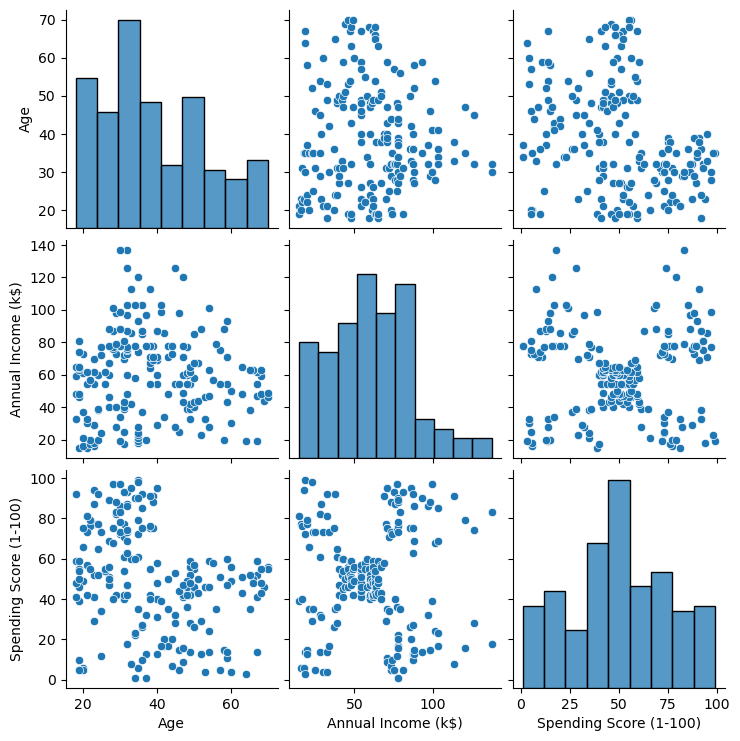

In [28]:
# Scatterplot (pairplot)
sns.pairplot(df4.drop("CustomerID", axis=1))
plt.show()

In [29]:
# calculez le pourcentage homme-femme (affichez le avec un print)
gender_counts = df4['Gender'].value_counts(normalize=True) * 100
print(f"Proportion de clients masculins: {gender_counts['Male']:.2f}%")
print(f"Proportion de clients féminins: {gender_counts['Female']:.2f}%")

Proportion de clients masculins: 44.00%
Proportion de clients féminins: 56.00%


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Analyse exploratoire des données. Complétez les lignes avec les informations obtenues. Ne changez pas la disposition des informations.</p>

*Réponse:*

 

- <strong>Revenu moyen des clients:</strong> 60.56k
- <strong>Revenu médian des clients:</strong> 61.5k
- <strong>Revenu minimum:</strong> 15k
- <strong>Revenu maximum:</strong> 137k
<br>
- <strong>Nombre et type de variables:</strong> 5 Variables au total:
   <li>CustomerID  (Numérique)</li>
   <li>Gender (Catégorie)</li>
   <li>Age (Numérique)</li>
   <li>Annual Income (Numérique)</li>
   <li>Spending score (Numérique)</li>
  <br>
- <strong>Nombre d'observations:</strong> 200 

Détails: 
- Le revenu annuel est en milliers (unité)
- Le spending score est une note de 1 à 100 attribuée par le centre commercial basée sur le comportement du client et sa fréquence de dépensedéfinition. Pour mieux imaginer le concept en chine il y'a un système de crédit social qui note ses habitants, c'est le même principe.



---

### Partie 4.2: Clustering
(10 points)


Maintenant que l’on connait bien les données, nous allons essayer de définir des groupes de clients afin de pouvoir les cibler avec une campagne de publicités agressives pour les forcer à acheter plus de choses dont ils n’ont pas besoin comme par exemple le tout dernier éplucheur sécurisé permettant de peler ses légumes sans se blesser, et ce pour seulement 8.99$ HT ! Pour cela, nous allons utiliser l'algorithme k-means en testant plusieurs k et ceci pour deux groupes de variables. 




Trouvez le bon nombre de clusters pour les groupes de variables suivants, en vous servant de la méthode du coude. 

- Spending Score VS Age
- Dépense VS revenu annuel 
- Revenu, Spending Score et Age 


Vous pouvez trouver le code et des explications [ici](https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis), vous serez donc principalement notés sur le bon usage et la bonne interprétation (**mise en page y compris**) de ce code et de ses résultats. 

Ajoutez les cellules nécessaire pour le code. **Faites un résumé et une analyse des résultats dans la cellule ci-après.** Pour cette analyse, rendez un résultat complet mais concis en donnant les informations et conclusions importantes. Vous ne devez ni révolutionner le marketing ni écrire un roman sur l'histoire de k-means au travers des siècles. 



C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laure\anaconda3\envs\isd\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


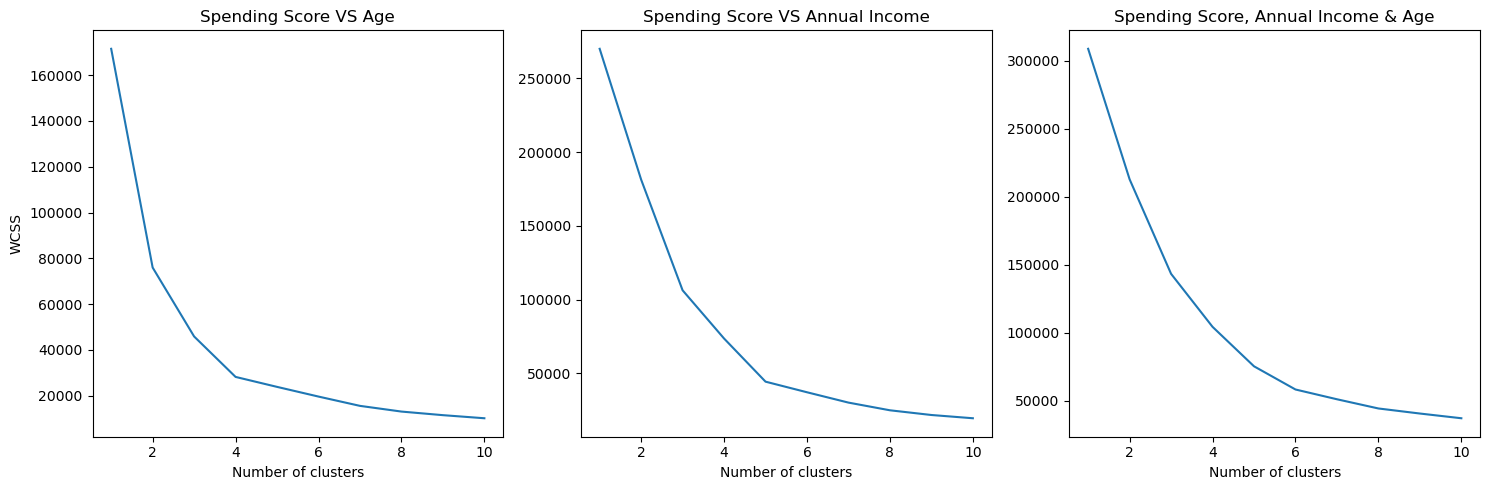

In [30]:
#import os

# Définir la variable d'environnement
#os.environ["OMP_NUM_THREADS"] = "1"

# Importer KMeans après avoir défini la variable d'environnement
from sklearn.cluster import KMeans


data_spending_age = df4[['Spending Score (1-100)', 'Age']]
data_spending_income = df4[['Spending Score (1-100)', 'Annual Income (k$)']]
data_all = df4[['Spending Score (1-100)', 'Annual Income (k$)', 'Age']]

# Fonction pour calculer le WCSS (Within-Cluster Sum of Square)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calcul du WCSS pour chaque groupe de variables
wcss_spending_age = calculate_wcss(data_spending_age)
wcss_spending_income = calculate_wcss(data_spending_income)
wcss_all = calculate_wcss(data_all)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, 11), wcss_spending_age)
plt.title('Spending Score VS Age')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(range(1, 11), wcss_spending_income)
plt.title('Spending Score VS Annual Income')
plt.xlabel('Number of clusters')

plt.subplot(1, 3, 3)
plt.plot(range(1, 11), wcss_all)
plt.title('Spending Score, Annual Income & Age')
plt.xlabel('Number of clusters')

plt.tight_layout()
plt.show()



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>R </b></font>Résumé et interprétation des résultats.</p>

*Réponse:*

<br>
<strong> Spending Score VS Age</strong>:<br>
Le graphique montre une diminution rapide du WCSS à mesure que le nombre de clusters augmente, avec un point de coude apparent autour de 4 ou 5 clusters. Cela suggère qu'au-delà de 4 ou 5 clusters, l'ajout de clusters supplémentaires n'améliore pas significativement la variation totale expliquée.
<br>
<br>
<strong>Spending Score VS Annual Income</strong>:<br>
Un point de coude est également visible autour de 5 clusters, indiquant que c'est le nombre optimal de clusters pour cette combinaison de variables. Au-delà de ce point, les gains en termes de réduction du WCSS sont marginaux.
<br><br>
<strong>Spending Score, Annual Income & Age</strong>:<br>
Le graphique montre un point de coude plus doux, mais il semble toujours être autour de 5 ou 6 clusters. Cela indique que ces trois variables ensemble peuvent être efficacement regroupées en 5 ou 6 segments distincts. 
<br><br>
<strong>Conclusion:</strong> <br>
5 clusters semblent être le nombre optimal pour segmenter les données. 


<br><br>
Src: <a href="https://mrmint.fr/algorithme-k-means#:~:text=G%C3%A9n%C3%A9ralement%2C%20le%20point%20du%20coude,5%20clusters%20et%209%20clusters.">Tout ce que vous voulez savoir sur l’algorithme K-Means</a>

---

<div class="alert alert-block alert-info">
<b>Corrections 4: </b> Points obtenus: 19/25
</div>

Remarques: 4.2 :

Manque affichage des groupes -4p et analyse des groupes -2p

<div class="alert alert-block alert-info">
Retrait de 3 points pour l'archive rendu avec un underscore
</div>

---

(Optionnel) Si vous faites ce labo avant les fêtes, exécutez la cellule ci-dessous. 

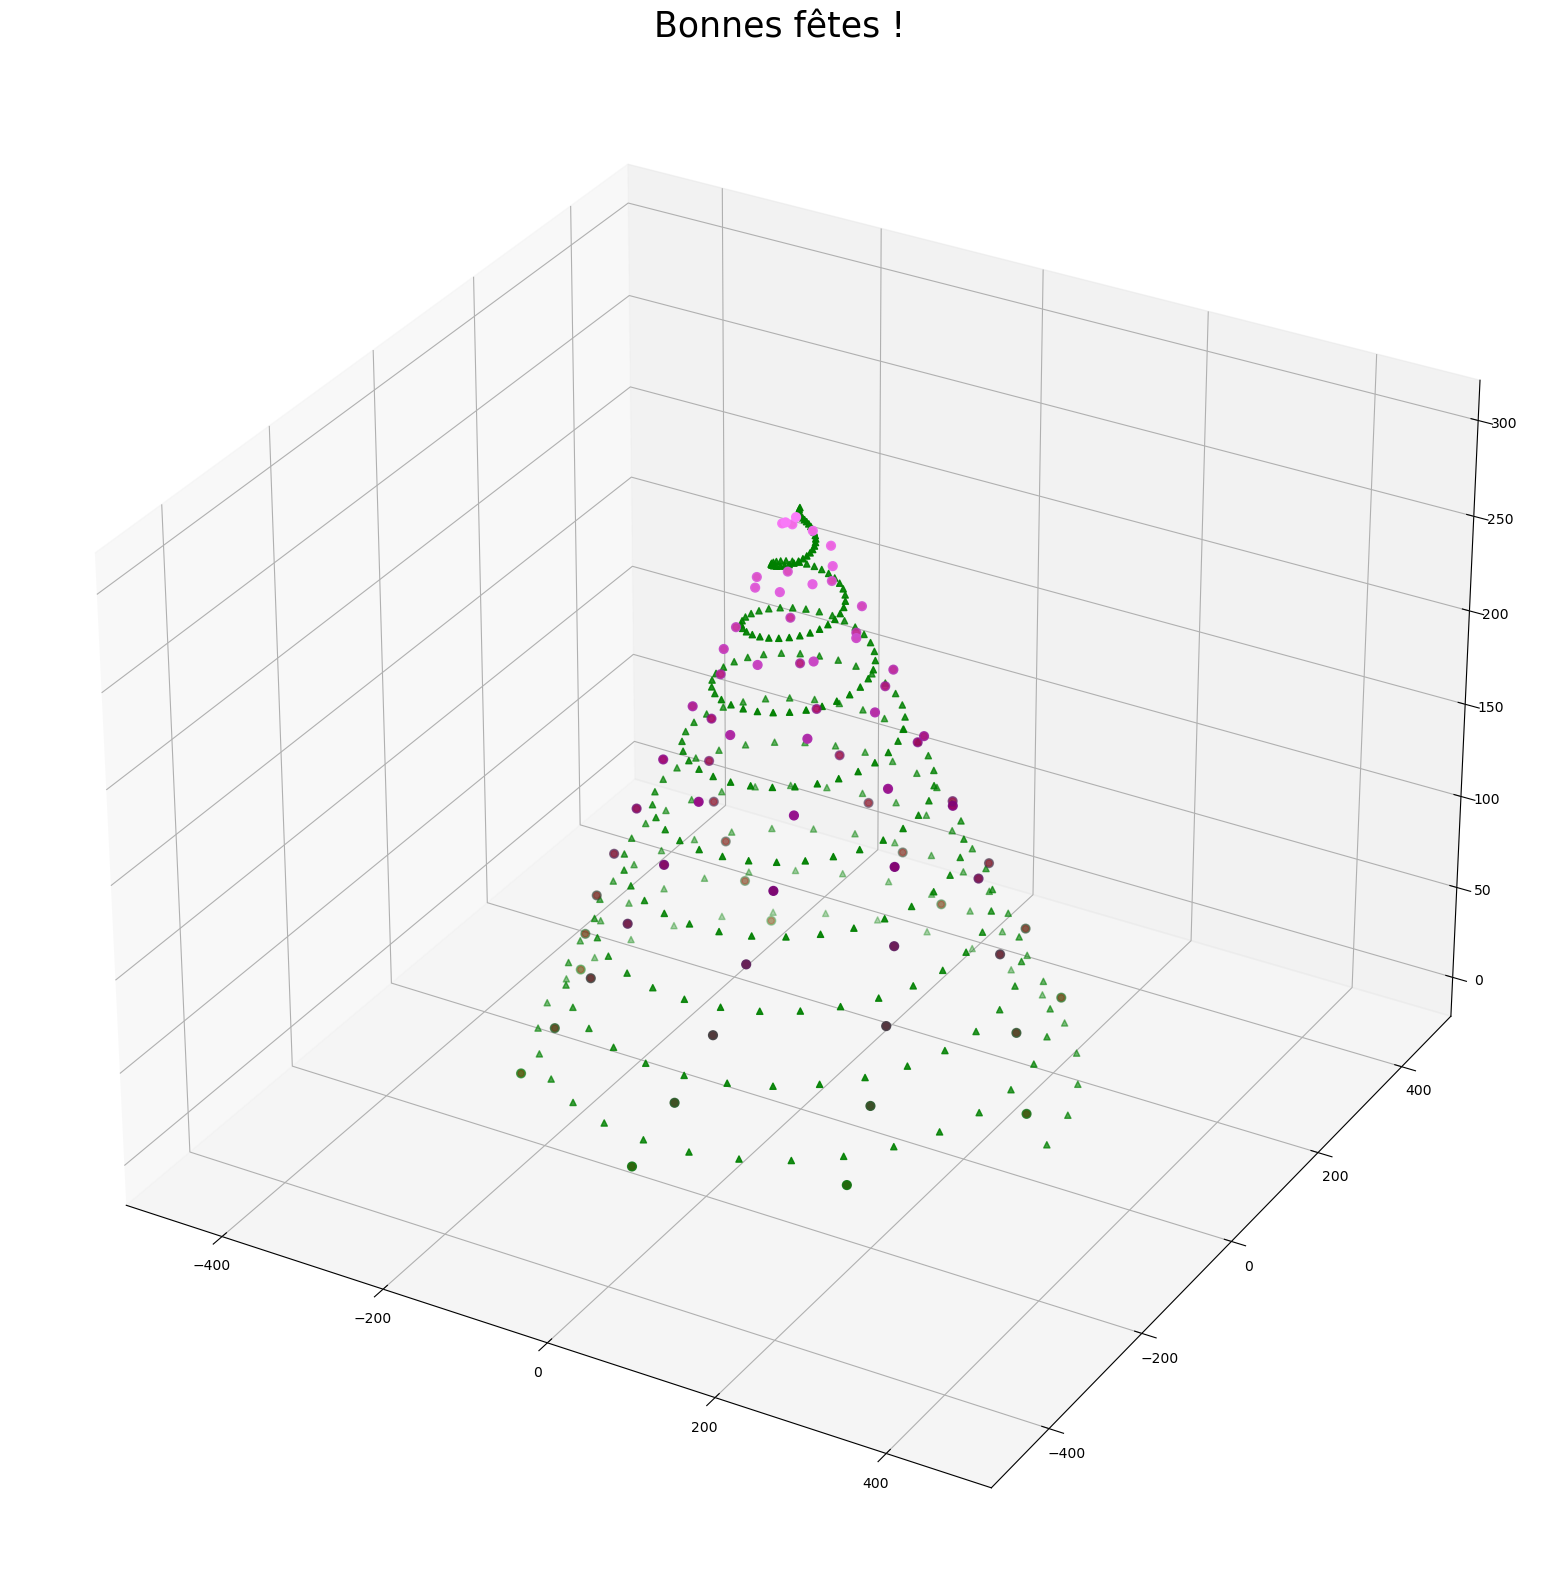

In [1]:
# Code goulûment copié de: 
# https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")

k=300
Z = [i for i in range(k)]
X = [math.cos(i/5)*(k-i) for i in range(k)]
Y = [math.sin(i/5)*(k-i) for i in range(k)]
ax.scatter(X,Y,Z, c="green", marker="^")
k=300
step = 4
Z = [i for i in range(1,k,step)]
X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c="red", marker="o")

c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c=c, marker="o",s=40)


plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("Bonnes fêtes !", {'fontsize': 25})
plt.show()

